# SR Task Version: Converging Structure

In [26]:
#import modules
from random import sample
from numpy.random import choice
from random import random
from random import shuffle
from random import randint
import scipy.special as sf
import numpy as np
import pandas as pd
import scipy as sp
import math
from learning_to_plan_functions import model_based_learning
from learning_to_plan_functions import one_step_successor_representation

#defines states, state transitions, and rewards
final_rewards=[{'compass':10,'tophat':-10,'microphone':-10,'snorkel':-10,'north':-10},
               {'compass':-10,'tophat':10,'microphone':-10,'snorkel':-10,'north':-10},
               {'compass':-10,'tophat':-10,'microphone':10,'snorkel':-10,'north':-10},
               {'compass':-10,'tophat':-10,'microphone':-10,'snorkel':10,'north':-10},
               {'compass':-10,'tophat':-10,'microphone':-10,'snorkel':-10,'north':10}
              ]

#list of upcoming states to determine how to present upcoming immediate rewards
upcoming_states=[2,3,3]

#choice function
max_choice=1

#stage 1
transitions=[[['apple'],['trident'],['window'],['abacus'],['bell'],['watch'],['north'],['compass']], 
             
[['fox'],['fireworks']], 
[['fireworks'],['fox']], 
[['fox'],['fireworks']],
[['fireworks'],['fox']],
[['tree','tree']],
[['tree','tree']],
[['bowling','bowling']],
[['bowling','bowling']],
             
[['houses']*8+['train']*2,['train']*5+['houses']*5],
[['train']*5+['houses']*5,['train']*5+['houses']*5],
[['train']*5+['houses']*5,['train']*5+['houses']*5],
[['train']*5+['houses']*5,['train']*8+['houses']*2]]

state_transitions_dictionary={
#starting state
'start':0,
#second stage
'apple':1,'trident':2,'window':3,'abacus':4,'bell':5,'watch':6,'north':7,'compass':8,
#third stage
'fox':9,'fireworks':10,'tree':11,'bowling':12,
#final
'houses':13,'train':14

}

sr_dictionary={
#starting state
'start':0,
#second stage
'apple':8,'trident':10,'window':12,'abacus':14,'bell':16,'watch':18,'north':20,'compass':22,
#third stage
'fox':24,'fireworks':26,'tree':28,'bowling':30,
#final
'houses':31,'train':32

}



experience_counter=np.zeros(26)

pr_learningrate=1

one_hot_vector=np.zeros(26)
one_hot_vector[0]=1
start1=one_hot_vector
one_hot_vector=np.zeros(26)
one_hot_vector[1]=1
start2=one_hot_vector
one_hot_vector=np.zeros(26)
one_hot_vector[2]=1
start3=one_hot_vector
one_hot_vector=np.zeros(26)
one_hot_vector[3]=1
start4=one_hot_vector
one_hot_vector=np.zeros(26)
one_hot_vector[4]=1
start5=one_hot_vector
one_hot_vector=np.zeros(26)
one_hot_vector[5]=1
start6=one_hot_vector
one_hot_vector=np.zeros(26)
one_hot_vector[6]=1
start7=one_hot_vector
one_hot_vector=np.zeros(26)
one_hot_vector[7]=1
start8=one_hot_vector

#training in just state transitions first
PR_matrix=np.identity(26)
SR_matrix=np.identity(26)

#fill in starting state with no predecessors - this means no updates are required
PR_matrix[0]=start1
PR_matrix[1]=start2
PR_matrix[2]=start3
PR_matrix[3]=start4
PR_matrix[4]=start5
PR_matrix[5]=start6
PR_matrix[6]=start7
PR_matrix[7]=start8



#training in just state transitions first
one_hot_vector=np.zeros(26)
one_hot_vector[24]=1
final1=one_hot_vector
one_hot_vector=np.zeros(26)
one_hot_vector[25]=1
final2=one_hot_vector


#fill in final states with no sucessors - this means no updates are required
SR_matrix[24]=final1
SR_matrix[25]=final2


full_trials_learning=2000000
trial_run=1000

for i in range(full_trials_learning):

    #starting state
    state1='start' 

    #decision 1
    choice1=np.random.randint(8) #random policy
    experience_counter[sr_dictionary[state1]+choice1]+=1
    
    #first state transition
    state2=sample(transitions[state_transitions_dictionary[state1]][choice1],1)[0]

    #transition 2
    experience_counter[sr_dictionary[state2]]+=1
    
    
    #second state transition
    state3=sample(transitions[state_transitions_dictionary[state2]][0],1)[0]
    
    #decision 3
    #no decision at this terminal state

    choice3=np.random.randint(2) #random policy
    experience_counter[sr_dictionary[state3]+choice3]+=1
    
    #third state transition
    state4=sample(transitions[state_transitions_dictionary[state3]][choice3],1)[0]
    experience_counter[sr_dictionary[state4]]+=1



    #Because PR predicts long-run past events, you must start at the end, and update all cached actions and transitions in reverse
    #update #1 of s-a PR matrix

    one_hot_vector_currentstate=np.zeros(26)
    one_hot_vector_currentstate[sr_dictionary[state4]]=1
    PR_matrix[sr_dictionary[state4]]=PR_matrix[sr_dictionary[state4]]+(pr_learningrate/experience_counter[sr_dictionary[state4]])*(one_hot_vector_currentstate+PR_matrix[sr_dictionary[state3]+choice3]-PR_matrix[sr_dictionary[state4]])


    #update #2 of s-a PR matrix
    one_hot_vector_currentstate=np.zeros(26)
    one_hot_vector_currentstate[sr_dictionary[state3]+choice3]=1
    PR_matrix[sr_dictionary[state3]+choice3]=PR_matrix[sr_dictionary[state3]+choice3]+(pr_learningrate/experience_counter[sr_dictionary[state3]+choice3])*(one_hot_vector_currentstate+PR_matrix[sr_dictionary[state2]]-PR_matrix[sr_dictionary[state3]+choice3])

    #update #3 of s-a PR matrix
    one_hot_vector_currentstate=np.zeros(26)
    one_hot_vector_currentstate[sr_dictionary[state2]]=1
    PR_matrix[sr_dictionary[state2]]=PR_matrix[sr_dictionary[state2]]+(pr_learningrate/experience_counter[sr_dictionary[state2]])*(one_hot_vector_currentstate+PR_matrix[sr_dictionary[state1]+choice1]-PR_matrix[sr_dictionary[state2]])


    #SR updates
    #update #1 of s-a SR matrix
    one_hot_vector_currentstate=np.zeros(26)
    one_hot_vector_currentstate[sr_dictionary[state1]+choice1]=1
    SR_matrix[sr_dictionary[state1]+choice1]=SR_matrix[sr_dictionary[state1]+choice1]+(pr_learningrate/experience_counter[sr_dictionary[state1]+choice1])*(one_hot_vector_currentstate+SR_matrix[sr_dictionary[state2]]-SR_matrix[sr_dictionary[state1]+choice1])

    #update #2 of s-a SR matrix
    one_hot_vector_currentstate=np.zeros(26)
    one_hot_vector_currentstate[sr_dictionary[state2]]=1
    SR_matrix[sr_dictionary[state2]]=SR_matrix[sr_dictionary[state2]]+(pr_learningrate/experience_counter[sr_dictionary[state2]])*(one_hot_vector_currentstate+SR_matrix[sr_dictionary[state3]+choice3]-SR_matrix[sr_dictionary[state2]])

    #update #3 of s-a SR matrix
    one_hot_vector_currentstate=np.zeros(26)
    one_hot_vector_currentstate[sr_dictionary[state3]+choice3]=1
    SR_matrix[sr_dictionary[state3]+choice3]=SR_matrix[sr_dictionary[state3]+choice3]+(pr_learningrate/experience_counter[sr_dictionary[state3]+choice3])*(one_hot_vector_currentstate+SR_matrix[sr_dictionary[state4]]-SR_matrix[sr_dictionary[state3]+choice3])


    
np.save('SR_matrix_sr_2actions_v2',SR_matrix)
np.save('PR_matrix_sr_2actions_v2',PR_matrix)

# Build CSVs for learning

In [191]:
import csv

sr_dict_action={}

transitions=[['apple.png','fox.png','houses.png'], 
['trident.png','fox.png','houses.png'], 
['window.png','fireworks.png','houses.png'],
['abacus.png','fireworks.png','houses.png'],
['bell.png','tree.png','train.png'],
['watch.png','tree.png','train.png'],
['north.png','bowling.png','train.png'],
['compass.png','bowling.png','train.png']]

pr_csv=[['stage1','stage2','stage3','action1']]
sr_csv=[['stage1','stage2','stage3','action1']]

for i in range(20):
    for i in range(8):
        current_line_sr=transitions[i].copy()
        current_line_sr.append(i+1)
        sr_csv.append(current_line_sr)
        current_line_pr=current_line_sr.copy()
        current_line_pr.remove(i+1)
        current_line_pr.reverse()
        if i<4:
            current_line_pr.append(1)
        else:
            current_line_pr.append(9)
            
        pr_csv.append(current_line_pr)

with open('pr_learning_trials.csv','w') as f:
    writer=csv.writer(f)
    writer.writerows(pr_csv)

with open('sr_learning_trials.csv','w') as f:
    writer=csv.writer(f)
    writer.writerows(sr_csv)

# SR Matrix

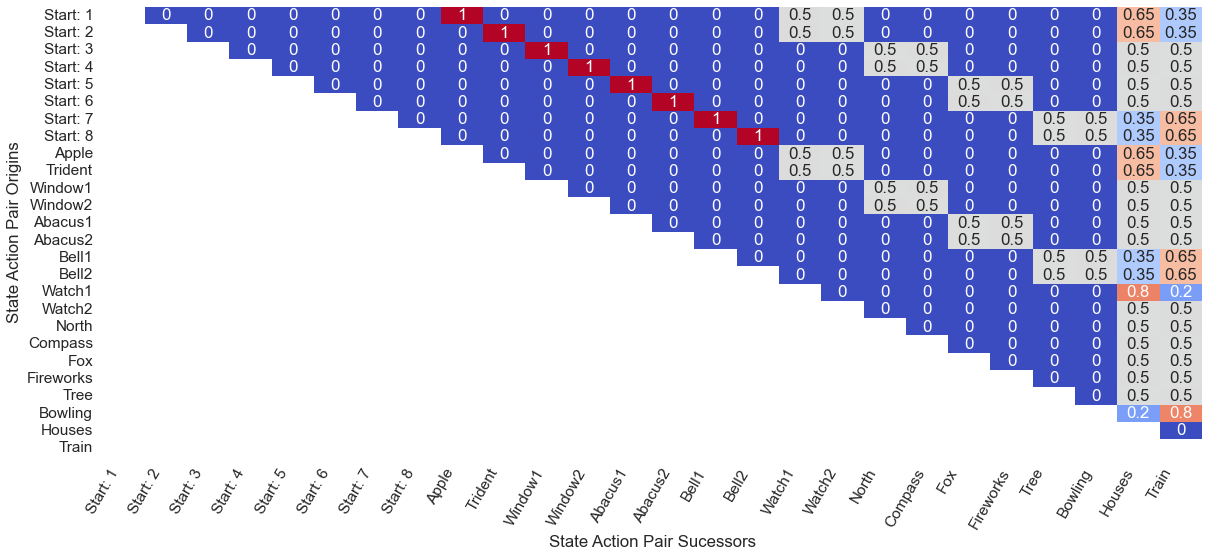

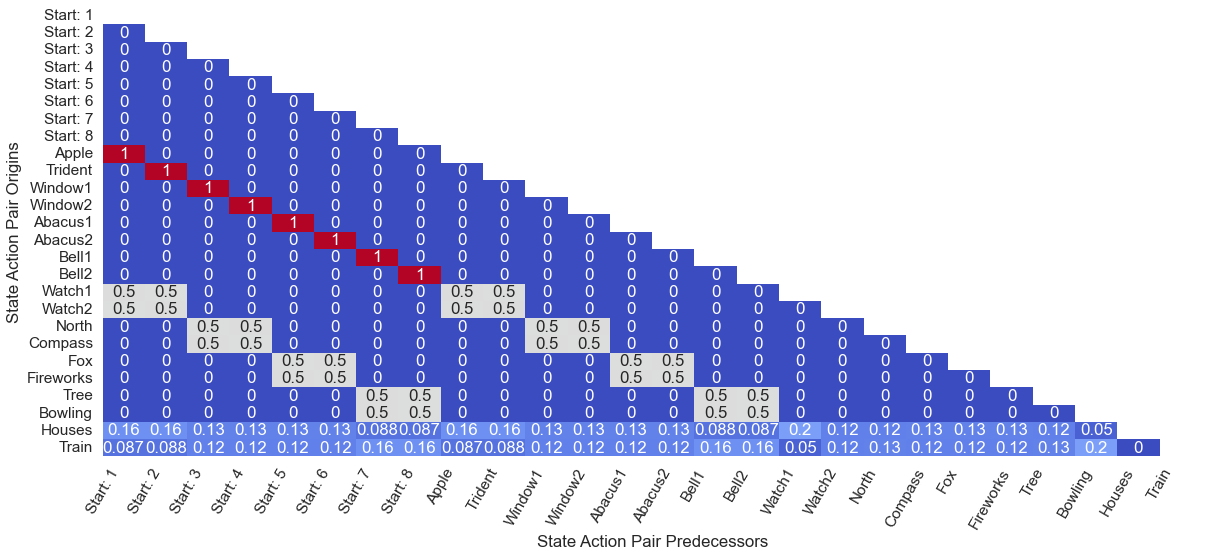

In [1]:
# SR trained matrix
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import rcParams
import matplotlib.pyplot as plt
sns.set(style='white', palette='deep', font='arial', font_scale=1.4, color_codes=True, rc=None)

rcParams['figure.figsize'] = 19.7,8.27
x=np.load('SR_matrix_sr_2actions.npy')

sns.color_palette("mako", as_cmap=True)

mask = np.tril(np.ones_like(x, dtype=bool))
ax = sns.heatmap(x,mask=mask,annot=True,cbar=False,cmap='coolwarm')


sr_dictionary={
#starting state
'start':0,
#second stage
'apple':1,'trident':2,'window':3,'abacus':4,'bell':5,'watch':6,'north':7,'compass':8,
#third stage
'fox':9,'fireworks':10,'tree':11,'bowling':12,
#final
'houses':13,'train':14

}
plt.yticks(np.arange(26)+0.5, ['Start: 1','Start: 2','Start: 3','Start: 4','Start: 5','Start: 6','Start: 7','Start: 8',
                                    'Apple','Trident',
                                    'Window1','Window2',
                                    'Abacus1','Abacus2',
                                    'Bell1','Bell2',
                                    'Watch1','Watch2',
                                    'North','Compass',
                                    'Fox','Fireworks','Tree','Bowling',
                                    'Houses','Train'
                                    
                                   ])
plt.xticks(np.arange(26).tolist(), ['Start: 1','Start: 2','Start: 3','Start: 4','Start: 5','Start: 6','Start: 7','Start: 8',
                                    'Apple','Trident',
                                    'Window1','Window2',
                                    'Abacus1','Abacus2',
                                    'Bell1','Bell2',
                                    'Watch1','Watch2',
                                    'North','Compass',
                                    'Fox','Fireworks','Tree','Bowling',
                                    'Houses','Train'
                                    
                                   ])
plt.ylabel('State Action Pair Origins')
plt.xlabel('State Action Pair Sucessors')

plt.yticks(rotation=0) 
plt.xticks(rotation=60) 
# plt.savefig('SR_matrix_hp.png', dpi=300, bbox_inches='tight')

plt.show()


rcParams['figure.figsize'] = 19.7,8.27
x=np.load('PR_matrix_sr_2actions.npy')

sns.color_palette("mako", as_cmap=True)

mask = np.triu(np.ones_like(x, dtype=bool))
ax = sns.heatmap(x,mask=mask,annot=True,cbar=False,cmap='coolwarm')


state_transitions_dictionary={
#starting state
'start':0,
#second stage
'apple':1,'trident':2,'window':3,'abacus':4,'bell':5,'watch':6,
#third stage
'fox':7,'fireworks':8,'tree':9,'bowling':10,
#final
'houses':11,'train':12,

}
plt.yticks(np.arange(26)+0.5, ['Start: 1','Start: 2','Start: 3','Start: 4','Start: 5','Start: 6','Start: 7','Start: 8',
                                    'Apple','Trident',
                                    'Window1','Window2',
                                    'Abacus1','Abacus2',
                                    'Bell1','Bell2',
                                    'Watch1','Watch2',
                                    'North','Compass',
                                    'Fox','Fireworks','Tree','Bowling',
                                    'Houses','Train'
                                    
                                   ])
plt.xticks(np.arange(26).tolist(), ['Start: 1','Start: 2','Start: 3','Start: 4','Start: 5','Start: 6','Start: 7','Start: 8',
                                    'Apple','Trident',
                                    'Window1','Window2',
                                    'Abacus1','Abacus2',
                                    'Bell1','Bell2',
                                    'Watch1','Watch2',
                                    'North','Compass',
                                    'Fox','Fireworks','Tree','Bowling',
                                    'Houses','Train'
                                    
                                   ])
plt.ylabel('State Action Pair Origins')
plt.xlabel('State Action Pair Predecessors')

plt.yticks(rotation=0) 
plt.xticks(rotation=60) 
# plt.savefig('SR_matrix_hp.png', dpi=300, bbox_inches='tight')

plt.show()

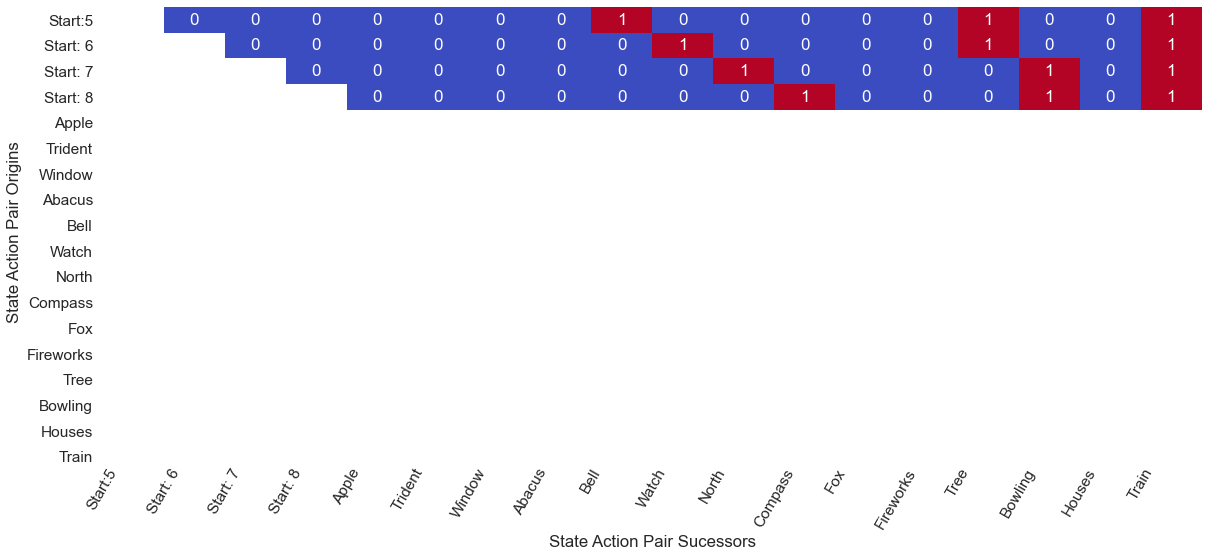

In [43]:
x=np.load('SR_matrix_srtask.npy')
y=x[4:8,4:]
# y = np.delete(y, (1), axis=0)
# y = np.delete(y, (1), axis=1)
# np.save('SR_matrix_srtask_choice1bad',y)
sns.color_palette("mako", as_cmap=True)

mask = np.tril(np.ones_like(y, dtype=bool))
ax = sns.heatmap(y,mask=mask,annot=True,cbar=False,cmap='coolwarm')
plt.yticks(np.arange(18)+0.5, ['Start:5','Start: 6','Start: 7','Start: 8',
                                    'Apple','Trident',
                                    'Window','Abacus',
                                    'Bell','Watch','North','Compass',
                                    'Fox','Fireworks','Tree','Bowling',
                                    'Houses','Train'
                                    
                                   ])
plt.xticks(np.arange(18).tolist(), ['Start:5','Start: 6','Start: 7','Start: 8',
                                    'Apple','Trident',
                                    'Window','Abacus',
                                    'Bell','Watch','North','Compass',
                                    'Fox','Fireworks','Tree','Bowling',
                                    'Houses','Train'
                                   ])
plt.ylabel('State Action Pair Origins')
plt.xlabel('State Action Pair Sucessors')

plt.yticks(rotation=0) 
plt.xticks(rotation=60) 
# plt.savefig('SR_matrix_hp.png', dpi=300, bbox_inches='tight')

plt.show()

# Converge Design SR planning

In [5]:
''' Learning to Plan v1

Written By Paul Sharp 7-6-21

The task is a 4-step decision problem,
in which end states are known to the agent
when deciding at each step.

The goal is for the agent to learn when to plan.

The MDP is structured such that each end-state has
an optimal planning startin point as a function of 
conditional probabilities

'''

#import modules
from random import sample
from numpy.random import choice
from random import random
from random import shuffle
from random import randint
import scipy.special as sf
import numpy as np
import pandas as pd
import scipy as sp
import math
# from learning_to_plan_functions import model_based_learning
# from learning_to_plan_functions import one_step_successor_representation
import numpy as np
import pickle

#TASK PARAMETERS
final_reward_magnitude=10
number_trials=2
number_goal=int(number_trials/2)
#defines states, state transitions, and rewards
final_rewards=[{'houses':final_reward_magnitude,'train':0},
               {'houses':final_reward_magnitude,'train':0}]*number_goal

ir_value=4
immediate_rewards=[[[0,0,0,0,0,0,ir_value,0],[0,0,0,0]],
                  [[0,0,0,0,0,0,ir_value,0],[0,0,0,0]]]




#list of upcoming states to determine how to present upcoming immediate rewards
upcoming_states=[2,3,3]

#choice function
max_choice=0


        
transitions=[[['apple'],['trident'],['window'],['abacus'],['bell'],['watch'],['north'],['compass']], 
             
[['fox','fox']], 
[['fox','fox']], 
[['fireworks','fireworks']],
[['fireworks','fireworks']],
[['tree','tree']],
[['tree','tree']],
[['bowling','bowling']],
[['bowling','bowling']],
             
[['houses']*8+['train']*2,['train']*5+['houses']*5],
[['train']*5+['houses']*5,['train']*5+['houses']*5],
[['train']*5+['houses']*5,['train']*5+['houses']*5],
[['train']*5+['houses']*5,['train']*8+['houses']*2]]

state_transitions_dictionary={
#starting state
'start':0,
#second stage
'apple':1,'trident':2,'window':3,'abacus':4,'bell':5,'watch':6,'north':7,'compass':8,
#third stage
'fox':9,'fireworks':10,'tree':11,'bowling':12,
#final
'houses':13,'train':14

}

SR_dictionary={
#starting state
'start':0,
#second stage
'apple':8,'trident':9,'window':10,'abacus':11,'bell':12,'watch':13,'north':14,'compass':15,
#third stage
'fox':16,'fireworks':18,'tree':20,'bowling':22,
#final
'houses':24,'train':25

}



#immediate reward range
ir=10
# Meta-Control: Do I plan at a given stage
# cache MB values of each action one can take at a stage
# KEY: if  one action compared to others is more valuable, deploy planning

#planning threshold for meta-control:

reached_final={'houses':[],'train':[]}
faced_final={'houses':0,'train':0}
first_choice_north={'choices':[]}
SR_matrix=np.load('SR_matrix_sr_2actions.npy')
rewards=0
got_there=0
history_action_sequences=[]

final_locations_experiences=[]
choosing_best=0
number_runs=5000
#play task with rewards
for run in range(number_runs):

    reached_final_run={'houses':0,'train':0}
    
    for episode in range(number_trials):
        rewards_trial=0
        current_action_sequence=[]
        current_reward_function=np.zeros(26)
        
        #STAGE 1
        stage=1

        # participant is told the end states
        final_rewards_trial=final_rewards[episode]

        
        # print('\nfinal rewards {}'.format(final_rewards_trial)
        final_reward_index_start=24
        for k,v in final_rewards_trial.items():
            current_reward_function[final_reward_index_start]=v
            final_reward_index_start+=1
            if v==final_reward_magnitude:
                current_destination=k

                #participant is told immediate rewards for upcoming states

        immediate_reward=immediate_rewards[episode][stage-1]
        immediate_rewards_sa=[val for val in immediate_reward]
        
        current_reward_function[8:16]=immediate_rewards_sa
        starting_state_values=[]
        for i in range(0,8,2):
            starting_state_values.append(np.matmul(SR_matrix[i],current_reward_function))
#         print(starting_state_values)
            
        difference_sr=np.max(starting_state_values)-np.min(starting_state_values)
        
      

        #determine action via softmax or max choice function
        if max_choice==0:
            action_values = np.exp((starting_state_values)-sf.logsumexp(starting_state_values))
            values=action_values.flatten()
            draw = choice(values,1,p=values)[0]
            indices = [i for i, x in enumerate(values) if x == draw]
            current_choice=sample(indices,1)[0]
            current_action_sequence.append(current_choice)
        else:
            if difference_sr>0.01:
                current_choice=starting_state_values.index(max(starting_state_values))
        
  
        if current_destination=='houses':
            if current_choice==0:
                choosing_best+=1
                
        elif current_destination=='train':
            if current_choice==3:
                choosing_best+=1
        
        start_dict={0:0,1:2,2:4,3:6}
        #experience state transition
        next_state=sample(transitions[state_transitions_dictionary['start']][start_dict[current_choice]],1)[0]
            


        #receive immediate reward
        rewards+=immediate_rewards_sa[current_choice]


        # STAGES 2-4
        for stage in range(2,4):
            current_reward_function=np.zeros(26)
            final_reward_index_start=24
            for k,v in final_rewards_trial.items():
                current_reward_function[final_reward_index_start]=v
                final_reward_index_start+=1
            #participant is told immediate rewards for upcoming states
            if stage==2:
                immediate_reward=immediate_rewards[episode][stage-1]
                immediate_rewards_sa=[val for val in immediate_reward for _ in (0, 1)]
                current_reward_function[16:24]=immediate_rewards_sa
                
   

            QPR_left=np.matmul(SR_matrix[SR_dictionary[next_state]],current_reward_function)
            QPR_right=np.matmul(SR_matrix[SR_dictionary[next_state]+1],current_reward_function)

            qvalues=[QPR_left,QPR_right]

            # print('big reward: {}, stage : {}, qvalues: {}'.format(current_destination ,stage,qvalues))
            difference_sr=np.max(qvalues)-np.min(qvalues)
            

            #determine action via softmax or max choice function
            if max_choice==0:
                action_values = np.exp((qvalues)-sf.logsumexp(qvalues))
                values=action_values.flatten()
                draw = choice(values,1,p=values)[0]
                indices = [i for i, x in enumerate(values) if x == draw]
                current_choice=sample(indices,1)[0]
                current_action_sequence.append(current_choice)
            else:
                if difference_sr>0.01:
                    current_choice=qvalues.index(max(qvalues))

                else:
                    current_choice=np.random.randint(2)
            if stage==2:
                current_choice-=1

            #receive immediate reward
            rewards+=immediate_reward[current_choice]

            rewards_trial+=immediate_reward[current_choice]
            #experience state transition

            next_state=sample(transitions[state_transitions_dictionary[next_state]][current_choice],1)[0]
            
            if stage==3:
                rewards+=final_rewards_trial[next_state]
                if final_rewards_trial[next_state]==final_reward_magnitude:
                    got_there+=1
                    reached_final_run[current_destination]+=1
        
            

        
        final_locations_experiences.append(current_destination) #save experience of current destination
        done_planning=0 #reset planning
    for k,v in reached_final_run.items():
        reached_final[k].append(v)
                

# for key,value in stage_when_to_plan.items():
#     if value==0:
#         print('For final state {}, planning depth = {}'.format(key,'unplannable'))
#     else:
#         print('For final state {}, planning depth = {}'.format(key,5-value))
from statsmodels.stats.proportion import proportions_ztest
print('\nrewards average {}  using SR'.format(rewards/number_runs))
print('\ndestination got there average {}  using SR'.format(got_there/number_runs))
print('percentage times chose best:{}'.format(choosing_best/10000.0))
count = choosing_best
nobs = 10000
value = .25
stat, pval = proportions_ztest(count, nobs, value)
print('p-value proportions test {0:0.3f}'.format(pval))

# destinations=[]
# reached=[]
# df_PR_task2=pd.DataFrame()
# for k,v in reached_final.items():
#     for i in v:
#         destinations.append(k)
#         reached.append(i)
# df_PR_task2['destination']=destinations
# df_PR_task2['reached']=[x/6.0 for x in reached]
# sns.catplot(x="destination", y="reached", kind="box", data=df_PR_task2)
# plt.tight_layout()
# plt.show()


rewards average 11.06  using SR

destination got there average 1.106  using SR
percentage times chose best:0.2396
p-value proportions test 0.015


# Converge Design PR planning

In [4]:
''' Learning to Plan v1

Written By Paul Sharp 7-6-21

The task is a 4-step decision problem,
in which end states are known to the agent
when deciding at each step.

The goal is for the agent to learn when to plan.

The MDP is structured such that each end-state has
an optimal planning startin point as a function of 
conditional probabilities

'''

#import modules
from random import sample
from numpy.random import choice
from random import random
from random import shuffle
from random import randint
import scipy.special as sf
import numpy as np
import pandas as pd
import scipy as sp
import math
# from learning_to_plan_functions import model_based_learning
# from learning_to_plan_functions import one_step_successor_representation
import numpy as np
import pickle

#TASK PARAMETERS
final_reward_magnitude=10
number_trials=2
number_goal=int(number_trials/2)
#defines states, state transitions, and rewards
final_rewards=[{'houses':final_reward_magnitude,'train':0},
               {'houses':final_reward_magnitude,'train':0}]*number_goal

ir_value=4
immediate_rewards=[[[0,0,0,0,0,0,ir_value,0],[0,0,0,0]],
                  [[0,0,0,0,0,0,ir_value,0],[0,0,0,0]]]


#list of upcoming states to determine how to present upcoming immediate rewards
upcoming_states=[2,3,3]

#choice function
max_choice=0


        
transitions=[[['apple'],['trident'],['window'],['abacus'],['bell'],['watch'],['north'],['compass']], 
             
[['fox','fox']], 
[['fox','fox']], 
[['fireworks','fireworks']],
[['fireworks','fireworks']],
[['tree','tree']],
[['tree','tree']],
[['bowling','bowling']],
[['bowling','bowling']],
             
[['houses']*8+['train']*2,['train']*5+['houses']*5],
[['train']*5+['houses']*5,['train']*5+['houses']*5],
[['train']*5+['houses']*5,['train']*5+['houses']*5],
[['train']*5+['houses']*5,['train']*8+['houses']*2]]

state_transitions_dictionary={
#starting state
'start':0,
#second stage
'apple':1,'trident':2,'window':3,'abacus':4,'bell':5,'watch':6,'north':7,'compass':8,
#third stage
'fox':9,'fireworks':10,'tree':11,'bowling':12,
#final
'houses':13,'train':14

}

PR_dictionary={
#starting state
'start':0,
#second stage
'apple':8,'trident':9,'window':10,'abacus':11,'bell':12,'watch':13,'north':14,'compass':15,
#third stage
'fox':16,'fireworks':18,'tree':20,'bowling':22,
#final
'houses':24,'train':25

}



#immediate reward range
ir=10
# Meta-Control: Do I plan at a given stage
# cache MB values of each action one can take at a stage
# KEY: if  one action compared to others is more valuable, deploy planning

#planning threshold for meta-control:

reached_final={'houses':[],'train':[]}
faced_final={'houses':0,'train':0}
first_choice_north={'choices':[]}
PR_matrix=np.load('PR_matrix_sr_2actions.npy')
rewards=0
got_there=0
history_action_sequences=[]

final_locations_experiences=[]
choosing_best=0
number_runs=5000
#play task with rewards
for run in range(number_runs):

    reached_final_run={'houses':0,'train':0}
    
    for episode in range(number_trials):
        rewards_trial=0
        current_action_sequence=[]
        current_reward_function=np.zeros(26)
        
        #STAGE 1
        stage=1

        # participant is told the end states
        final_rewards_trial=final_rewards[episode]

        
        # print('\nfinal rewards {}'.format(final_rewards_trial)
        final_reward_index_start=24
        for k,v in final_rewards_trial.items():
            current_reward_function[final_reward_index_start]=v
            final_reward_index_start+=1
            if v==final_reward_magnitude:
                current_destination=k

                #participant is told immediate rewards for upcoming states

        immediate_reward=immediate_rewards[episode][stage-1]
        immediate_rewards_sa=[val for val in immediate_reward]
        
        current_reward_function[8:16]=immediate_rewards_sa
        starting_state_values=[]
        for i in range(0,8,2):
            starting_state_values.append(np.matmul(PR_matrix[:,i],current_reward_function))
#         print(starting_state_values)
            
        difference_sr=np.max(starting_state_values)-np.min(starting_state_values)
        
      

        #determine action via softmax or max choice function
        if max_choice==0:
            action_values = np.exp((starting_state_values)-sf.logsumexp(starting_state_values))
            values=action_values.flatten()
            draw = choice(values,1,p=values)[0]
            indices = [i for i, x in enumerate(values) if x == draw]
            current_choice=sample(indices,1)[0]
            current_action_sequence.append(current_choice)
        else:
            if difference_sr>0.01:
                current_choice=starting_state_values.index(max(starting_state_values))
        
  
        if current_destination=='houses':
            if current_choice==0:
                choosing_best+=1
                
        elif current_destination=='train':
            if current_choice==3:
                choosing_best+=1
        
        start_dict={0:0,1:2,2:4,3:6}
        #experience state transition
        next_state=sample(transitions[state_transitions_dictionary['start']][start_dict[current_choice]],1)[0]
            


        #receive immediate reward
        rewards+=immediate_rewards_sa[current_choice]


        # STAGES 2-4
        for stage in range(2,4):
            current_reward_function=np.zeros(26)
            final_reward_index_start=24
            for k,v in final_rewards_trial.items():
                current_reward_function[final_reward_index_start]=v
                final_reward_index_start+=1
            #participant is told immediate rewards for upcoming states
            if stage==2:
                immediate_reward=immediate_rewards[episode][stage-1]
                immediate_rewards_sa=[val for val in immediate_reward for _ in (0, 1)]
                current_reward_function[16:24]=immediate_rewards_sa
                
   

            QPR_left=np.matmul(PR_matrix[:,PR_dictionary[next_state]],current_reward_function)
            QPR_right=np.matmul(PR_matrix[:,PR_dictionary[next_state]+1],current_reward_function)

            qvalues=[QPR_left,QPR_right]

            # print('big reward: {}, stage : {}, qvalues: {}'.format(current_destination ,stage,qvalues))
            difference_sr=np.max(qvalues)-np.min(qvalues)
            

            #determine action via softmax or max choice function
            if max_choice==0:
                action_values = np.exp((qvalues)-sf.logsumexp(qvalues))
                values=action_values.flatten()
                draw = choice(values,1,p=values)[0]
                indices = [i for i, x in enumerate(values) if x == draw]
                current_choice=sample(indices,1)[0]
                current_action_sequence.append(current_choice)
            else:
                if difference_sr>0.01:
                    current_choice=qvalues.index(max(qvalues))

                else:
                    current_choice=np.random.randint(2)
            if stage==2:
                current_choice-=1

            #receive immediate reward
            rewards+=immediate_reward[current_choice]

            rewards_trial+=immediate_reward[current_choice]
            #experience state transition

            next_state=sample(transitions[state_transitions_dictionary[next_state]][current_choice],1)[0]
            
            if stage==3:
                rewards+=final_rewards_trial[next_state]
                if final_rewards_trial[next_state]==final_reward_magnitude:
                    got_there+=1
                    reached_final_run[current_destination]+=1
        
            

        
        final_locations_experiences.append(current_destination) #save experience of current destination
        done_planning=0 #reset planning
    for k,v in reached_final_run.items():
        reached_final[k].append(v)
                

# for key,value in stage_when_to_plan.items():
#     if value==0:
#         print('For final state {}, planning depth = {}'.format(key,'unplannable'))
#     else:
#         print('For final state {}, planning depth = {}'.format(key,5-value))
from statsmodels.stats.proportion import proportions_ztest
print('\nrewards average {}  using PR'.format(rewards/number_runs))
print('\ndestination got there average {}  using PR'.format(got_there/number_runs))
print('percentage times chose best:{}'.format(choosing_best/10000.0))
count = choosing_best
nobs = 10000
value = .25
stat, pval = proportions_ztest(count, nobs, value)
print('p-value proportions test {0:0.3f}'.format(pval))

# destinations=[]
# reached=[]
# df_PR_task2=pd.DataFrame()
# for k,v in reached_final.items():
#     for i in v:
#         destinations.append(k)
#         reached.append(i)
# df_PR_task2['destination']=destinations
# df_PR_task2['reached']=[x/6.0 for x in reached]
# sns.catplot(x="destination", y="reached", kind="box", data=df_PR_task2)
# plt.tight_layout()
# plt.show()


rewards average 8.364  using PR

destination got there average 0.8364  using PR
percentage times chose best:0.0355
p-value proportions test 0.000


# Converge Design MB planning 

In [3]:
''' Learning to Plan v1

Written By Paul Sharp 7-6-21

The task is a 4-step decision problem,
in which end states are known to the agent
when deciding at each step.

The goal is for the agent to learn when to plan.

The MDP is structured such that each end-state has
an optimal planning startin point as a function of 
conditional probabilities

'''

#import modules
from random import sample
from numpy.random import choice
from random import random
from random import shuffle
from random import randint
import scipy.special as sf
import numpy as np
import pandas as pd
import scipy as sp
import math
from learning_to_plan_functions2 import model_based_learning_converge
# from learning_to_plan_functions import one_step_successor_representation
import numpy as np
import pickle

#TASK PARAMETERS
final_reward_magnitude=10
number_trials=2
number_goal=int(number_trials/2)
#defines states, state transitions, and rewards
final_rewards=[{'houses':final_reward_magnitude,'train':0},
               {'houses':final_reward_magnitude,'train':0}]*number_goal

ir_value=4
immediate_rewards=[[[0,0,0,0,0,0,ir_value,0],[0,0,0,0]],
                  [[0,0,0,0,0,0,ir_value,0],[0,0,0,0]]]


#list of upcoming states to determine how to present upcoming immediate rewards
upcoming_states=[2,3,3]

#choice function
max_choice=0


        
transitions=[[['apple'],['trident'],['window'],['abacus'],['bell'],['watch'],['north'],['compass']], 
             
[['fox','fox']], 
[['fox','fox']], 
[['fireworks','fireworks']],
[['fireworks','fireworks']],
[['tree','tree']],
[['tree','tree']],
[['bowling','bowling']],
[['bowling','bowling']],
             
[['houses']*8+['train']*2,['train']*5+['houses']*5],
[['train']*5+['houses']*5,['train']*5+['houses']*5],
[['train']*5+['houses']*5,['train']*5+['houses']*5],
[['train']*5+['houses']*5,['train']*8+['houses']*2]]

state_transitions_dictionary={
#starting state
'start':0,
#second stage
'apple':1,'trident':2,'window':3,'abacus':4,'bell':5,'watch':6,'north':7,'compass':8,
#third stage
'fox':9,'fireworks':10,'tree':11,'bowling':12,
#final
'houses':13,'train':14

}

PR_dictionary={
#starting state
'start':0,
#second stage
'apple':8,'trident':9,'window':10,'abacus':11,'bell':12,'watch':13,'north':14,'compass':15,
#third stage
'fox':16,'fireworks':18,'tree':20,'bowling':22,
#final
'houses':24,'train':25

}



#immediate reward range
ir=10
# Meta-Control: Do I plan at a given stage
# cache MB values of each action one can take at a stage
# KEY: if  one action compared to others is more valuable, deploy planning

#planning threshold for meta-control:

reached_final={'houses':[],'train':[]}
faced_final={'houses':0,'train':0}
first_choice_north={'choices':[]}
PR_matrix=np.load('PR_matrix_sr_2actions.npy')
rewards=0
got_there=0
history_action_sequences=[]

final_locations_experiences=[]
choosing_best=0
number_runs=5000
#play task with rewards
for run in range(number_runs):

    reached_final_run={'houses':0,'train':0}
    
    for episode in range(number_trials):
        rewards_trial=0
        current_action_sequence=[]
        current_reward_function=np.zeros(26)
        
        #STAGE 1
        stage=1

        # participant is told the end states
        final_rewards_trial=final_rewards[episode]

        
        # print('\nfinal rewards {}'.format(final_rewards_trial)
        final_reward_index_start=24
        for k,v in final_rewards_trial.items():
            current_reward_function[final_reward_index_start]=v
            final_reward_index_start+=1
            if v==final_reward_magnitude:
                current_destination=k

                #participant is told immediate rewards for upcoming states

        immediate_reward=immediate_rewards[episode][stage-1]

        immediate_rewards_sa=[val for val in immediate_reward]
        
        current_reward_function[8:16]=immediate_rewards_sa
        starting_state_values=[]

        [QMB_1,QMB_2,QMB_3,QMB_4]=model_based_learning_converge(stage,immediate_reward,'start',final_rewards_trial)
        qvalues=[QMB_1,QMB_2,QMB_3,QMB_4]
        for i in range(4):
            starting_state_values.append(qvalues[i])
            
        difference_sr=np.max(starting_state_values)-np.min(starting_state_values)
        
      

        #determine action via softmax or max choice function
        if max_choice==0:
            action_values = np.exp((starting_state_values)-sf.logsumexp(starting_state_values))
            values=action_values.flatten()
            draw = choice(values,1,p=values)[0]
            indices = [i for i, x in enumerate(values) if x == draw]
            current_choice=sample(indices,1)[0]
            current_action_sequence.append(current_choice)
        else:
            if difference_sr>0.01:
                current_choice=starting_state_values.index(max(starting_state_values))
        
  
        if current_destination=='houses':
            if current_choice==0:
                choosing_best+=1
                
        elif current_destination=='train':
            if current_choice==3:
                choosing_best+=1
        
        start_dict={0:0,1:2,2:4,3:6}
        #experience state transition
        next_state=sample(transitions[state_transitions_dictionary['start']][start_dict[current_choice]],1)[0]
            


        #receive immediate reward
        rewards+=immediate_rewards_sa[current_choice]


        # STAGES 2-4
        for stage in range(2,4):
         
            #participant is told immediate rewards for upcoming states
            if stage==2:
                immediate_reward=immediate_rewards[episode][stage-1]
                immediate_rewards_sa=[val for val in immediate_reward for _ in (0, 1)]


                [QMB_left,QMB_right]=model_based_learning_converge(stage,immediate_reward,next_state,final_rewards_trial)
                qvalues=[QMB_left,QMB_right]
            else:
                [QMB_left,QMB_right]=model_based_learning_converge(stage,immediate_reward,next_state,final_rewards_trial)
                qvalues=[QMB_left,QMB_right]
                
            # print('big reward: {}, stage : {}, qvalues: {}'.format(current_destination ,stage,qvalues))
            difference_sr=np.max(qvalues)-np.min(qvalues)
            

            #determine action via softmax or max choice function
            if max_choice==0:
                action_values = np.exp((qvalues)-sf.logsumexp(qvalues))
                values=action_values.flatten()
                draw = choice(values,1,p=values)[0]
                indices = [i for i, x in enumerate(values) if x == draw]
                current_choice=sample(indices,1)[0]
                current_action_sequence.append(current_choice)
            else:
                if difference_sr>0.01:
                    current_choice=qvalues.index(max(qvalues))

                else:
                    current_choice=np.random.randint(2)
            if stage==2:
                current_choice-=1

            #receive immediate reward
            rewards+=immediate_reward[current_choice]

            rewards_trial+=immediate_reward[current_choice]
            #experience state transition

            next_state=sample(transitions[state_transitions_dictionary[next_state]][current_choice],1)[0]
            
            if stage==3:
                rewards+=final_rewards_trial[next_state]
                if final_rewards_trial[next_state]==final_reward_magnitude:
                    got_there+=1
                    reached_final_run[current_destination]+=1
        
            

        
        final_locations_experiences.append(current_destination) #save experience of current destination
        done_planning=0 #reset planning
    for k,v in reached_final_run.items():
        reached_final[k].append(v)
                

# for key,value in stage_when_to_plan.items():
#     if value==0:
#         print('For final state {}, planning depth = {}'.format(key,'unplannable'))
#     else:
#         print('For final state {}, planning depth = {}'.format(key,5-value))
from statsmodels.stats.proportion import proportions_ztest
print('\nrewards average {}  using MB'.format(rewards/number_runs))
print('\ndestination got there average {}  using MB'.format(got_there/number_runs))
print('percentage times chose best:{}'.format(choosing_best/10000.0))
count = choosing_best
nobs = 10000
value = .25
stat, pval = proportions_ztest(count, nobs, value)
print('p-value proportions test {0:0.3f}'.format(pval))

# destinations=[]
# reached=[]
# df_PR_task2=pd.DataFrame()
# for k,v in reached_final.items():
#     for i in v:
#         destinations.append(k)
#         reached.append(i)
# df_PR_task2['destination']=destinations
# df_PR_task2['reached']=[x/6.0 for x in reached]
# sns.catplot(x="destination", y="reached", kind="box", data=df_PR_task2)
# plt.tight_layout()
# plt.show()


rewards average 11.356  using MB

destination got there average 1.1356  using MB
percentage times chose best:0.2627
p-value proportions test 0.004


# PR Task

In [12]:
#import modules
from random import sample
from numpy.random import choice
from random import random
from random import shuffle
from random import randint
import scipy.special as sf
import numpy as np
import pandas as pd
import scipy as sp
import math
# from learning_to_plan_functions import model_based_learning
# from learning_to_plan_functions import one_step_successor_representation

#stage 1
transitions=[[['apple'],['trident']],
            
[['window']*8+['abacus']*2,['watch']*8+['bell']*2],
[['bell']*8+['watch']*2,['window']*2+['abacus']*8],

[['north']*8+['compass']*2,['fox']*2+['fireworks']*8],         
[['fox']*8+['fireworks']*2,['north']*2+['compass']*8],
[['tree']*8+['bowling']*2,['houses']*2+['train']*8],            
[['houses']*8+['train']*2,['tree']*2+['bowling']*8]]

state_transitions_dictionary={
#starting state
'start':0,
#second stage
'apple':1,'trident':2,
    
'window':3,'abacus':4,'bell':5,'watch':6,
    
'north':7,'compass':8,'fox':9,'fireworks':10,'tree':11,'bowling':12,'houses':13,'train':14

}

sr_dictionary={
#starting state
'start':0,
#second stage
'apple':2,'trident':4,

'window':6,'abacus':8,'bell':10,'watch':12,

'north':14,'compass':15,'fox':16,'fireworks':17,'tree':18,'bowling':19,'houses':20,'train':21

}




experience_counter=np.zeros(22)

pr_learningrate=1

one_hot_vector=np.zeros(22)
one_hot_vector[0]=1
start1=one_hot_vector
one_hot_vector=np.zeros(22)
one_hot_vector[1]=1
start2=one_hot_vector


#training in just state transitions first
PR_matrix=np.identity(22)
SR_matrix=np.identity(22)

#fill in starting state with no predecessors - this means no updates are required
PR_matrix[0]=start1
PR_matrix[1]=start2



#training in just state transitions first
one_hot_vector=np.zeros(22)
one_hot_vector[14]=1
final1=one_hot_vector
one_hot_vector=np.zeros(22)
one_hot_vector[15]=1
final2=one_hot_vector
one_hot_vector=np.zeros(22)
one_hot_vector[16]=1
final3=one_hot_vector
one_hot_vector=np.zeros(22)
one_hot_vector[17]=1
final4=one_hot_vector
one_hot_vector=np.zeros(22)
one_hot_vector[18]=1
final5=one_hot_vector
one_hot_vector=np.zeros(22)
one_hot_vector[19]=1
final6=one_hot_vector
one_hot_vector=np.zeros(22)
one_hot_vector[20]=1
final7=one_hot_vector
one_hot_vector=np.zeros(22)
one_hot_vector[21]=1
final8=one_hot_vector


#fill in final states with no sucessors - this means no updates are required
SR_matrix[26-12]=final1
SR_matrix[27-12]=final2
SR_matrix[28-12]=final3
SR_matrix[29-12]=final4
SR_matrix[30-12]=final5
SR_matrix[31-12]=final6
SR_matrix[32-12]=final7
SR_matrix[33-12]=final8


#fill in final states with no sucessors - this means no updates are required

full_trials_learning=2000000
trial_run=1000

for i in range(full_trials_learning):

    #starting state
    state1='start' 

    #decision 1
    choice1=np.random.randint(2) #random policy
    experience_counter[sr_dictionary[state1]+choice1]+=1
    
    #first state transition
    state2=sample(transitions[state_transitions_dictionary[state1]][choice1],1)[0]

    #decision 2
    choice2=np.random.randint(2) #random policy
    experience_counter[sr_dictionary[state2]+choice2]+=1

    #second state transition
    state3=sample(transitions[state_transitions_dictionary[state2]][choice2],1)[0]
    

    #decision 3
    #no decision at this terminal state

    choice3=np.random.randint(2) #random policy
    experience_counter[sr_dictionary[state3]+choice3]+=1
    
    #third state transition
    state4=sample(transitions[state_transitions_dictionary[state3]][choice3],1)[0]
    experience_counter[sr_dictionary[state4]]+=1



    #Because PR predicts long-run past events, you must start at the end, and update all cached actions and transitions in reverse
    #update #1 of s-a PR matrix

    one_hot_vector_currentstate=np.zeros(22)
    one_hot_vector_currentstate[sr_dictionary[state4]]=1
    PR_matrix[sr_dictionary[state4]]=PR_matrix[sr_dictionary[state4]]+(pr_learningrate/experience_counter[sr_dictionary[state4]])*(one_hot_vector_currentstate+PR_matrix[sr_dictionary[state3]+choice3]-PR_matrix[sr_dictionary[state4]])


    #update #2 of s-a PR matrix
    one_hot_vector_currentstate=np.zeros(22)
    one_hot_vector_currentstate[sr_dictionary[state3]+choice3]=1
    PR_matrix[sr_dictionary[state3]+choice3]=PR_matrix[sr_dictionary[state3]+choice3]+(pr_learningrate/experience_counter[sr_dictionary[state3]+choice3])*(one_hot_vector_currentstate+PR_matrix[sr_dictionary[state2]+choice2]-PR_matrix[sr_dictionary[state3]+choice3])

    #update #3 of s-a PR matrix
    one_hot_vector_currentstate=np.zeros(22)
    one_hot_vector_currentstate[sr_dictionary[state2]+choice2]=1
    PR_matrix[sr_dictionary[state2]+choice2]=PR_matrix[sr_dictionary[state2]+choice2]+(pr_learningrate/experience_counter[sr_dictionary[state2]+choice2])*(one_hot_vector_currentstate+PR_matrix[sr_dictionary[state1]+choice1]-PR_matrix[sr_dictionary[state2]+choice2])


    #SR updates
    #update #1 of s-a SR matrix
    one_hot_vector_currentstate=np.zeros(22)
    one_hot_vector_currentstate[sr_dictionary[state1]+choice1]=1
    SR_matrix[sr_dictionary[state1]+choice1]=SR_matrix[sr_dictionary[state1]+choice1]+(pr_learningrate/experience_counter[sr_dictionary[state1]+choice1])*(one_hot_vector_currentstate+SR_matrix[sr_dictionary[state2]+choice2]-SR_matrix[sr_dictionary[state1]+choice1])

    #update #2 of s-a SR matrix
    one_hot_vector_currentstate=np.zeros(22)
    one_hot_vector_currentstate[sr_dictionary[state2]+choice2]=1
    SR_matrix[sr_dictionary[state2]+choice2]=SR_matrix[sr_dictionary[state2]+choice2]+(pr_learningrate/experience_counter[sr_dictionary[state2]+choice2])*(one_hot_vector_currentstate+SR_matrix[sr_dictionary[state3]+choice3]-SR_matrix[sr_dictionary[state2]+choice2])

    #update #3 of s-a SR matrix
    one_hot_vector_currentstate=np.zeros(22)
    one_hot_vector_currentstate[sr_dictionary[state3]+choice3]=1
    SR_matrix[sr_dictionary[state3]+choice3]=SR_matrix[sr_dictionary[state3]+choice3]+(pr_learningrate/experience_counter[sr_dictionary[state3]+choice3])*(one_hot_vector_currentstate+SR_matrix[sr_dictionary[state4]]-SR_matrix[sr_dictionary[state3]+choice3])


    
np.save('SR_matrix_pr_2actions',SR_matrix)
np.save('PR_matrix_pr_2actions',PR_matrix)

# Visualize Matrix

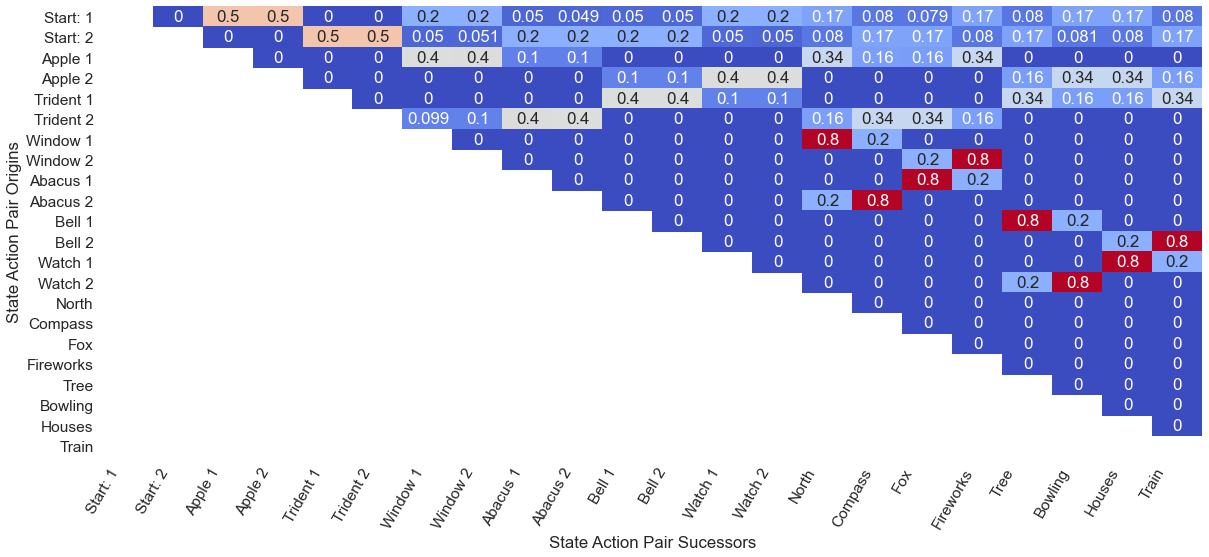

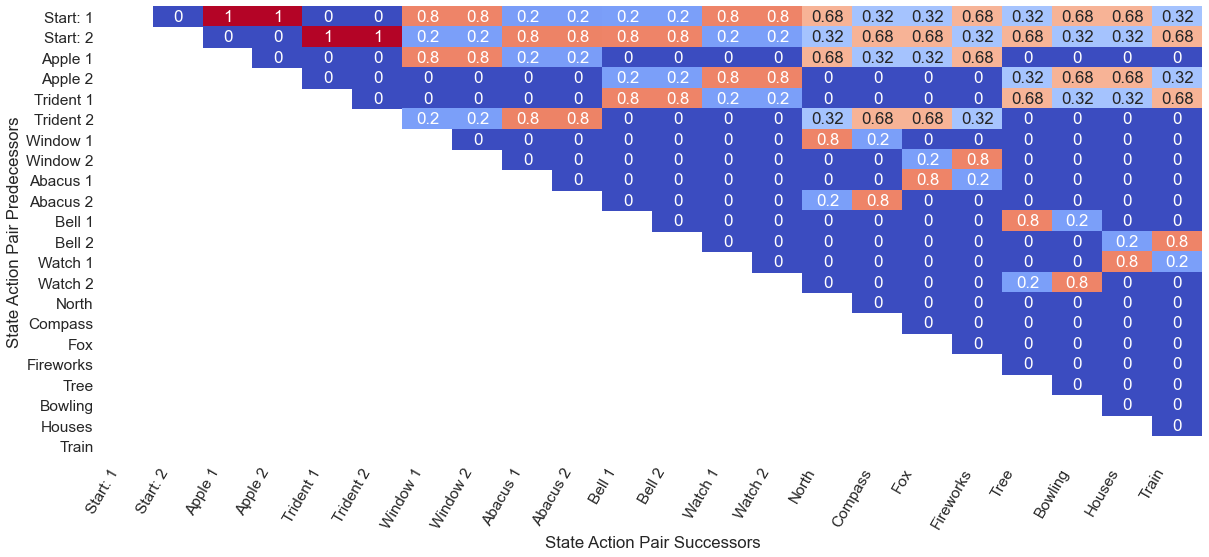

In [13]:
# SR trained matrix
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import rcParams
import matplotlib.pyplot as plt
sns.set(style='white', palette='deep', font='arial', font_scale=1.4, color_codes=True, rc=None)

rcParams['figure.figsize'] = 19.7,8.27
x=np.load('SR_matrix_pr_2actions.npy')

sns.color_palette("mako", as_cmap=True)

mask = np.tril(np.ones_like(x, dtype=bool))
ax = sns.heatmap(x,mask=mask,annot=True,cbar=False,cmap='coolwarm')


sr_dictionary={
#starting state
'start':0,
#second stage
'apple':1,'trident':2,'window':3,'abacus':4,'bell':5,'watch':6,'north':7,'compass':8,
#third stage
'fox':9,'fireworks':10,'tree':11,'bowling':12,
#final
'houses':13,'train':14

}
plt.yticks(np.arange(22)+0.5, ['Start: 1','Start: 2',
                                    'Apple 1','Apple 2',
                                    'Trident 1','Trident 2',
                                    'Window 1','Window 2',
                                    'Abacus 1','Abacus 2',
                                    'Bell 1','Bell 2',
                                    'Watch 1','Watch 2',
                                    'North','Compass',
                                    'Fox','Fireworks','Tree','Bowling',
                                    'Houses','Train'
                                    
                                   ])
plt.xticks(np.arange(22).tolist(), ['Start: 1','Start: 2',
                                    'Apple 1','Apple 2',
                                    'Trident 1','Trident 2',
                                    'Window 1','Window 2',
                                    'Abacus 1','Abacus 2',
                                    'Bell 1','Bell 2',
                                    'Watch 1','Watch 2',
                                    'North','Compass',
                                    'Fox','Fireworks','Tree','Bowling',
                                    'Houses','Train'
                                    
                                   ])
plt.ylabel('State Action Pair Origins')
plt.xlabel('State Action Pair Sucessors')

plt.yticks(rotation=0) 
plt.xticks(rotation=60) 
# plt.savefig('SR_matrix_hp.png', dpi=300, bbox_inches='tight')

plt.show()


rcParams['figure.figsize'] = 19.7,8.27
x=np.load('PR_matrix_pr_2actions.npy')
x=x.transpose()
sns.color_palette("mako", as_cmap=True)

mask = np.tril(np.ones_like(x, dtype=bool))
ax = sns.heatmap(x,mask=mask,annot=True,cbar=False,cmap='coolwarm')


state_transitions_dictionary={
#starting state
'start':0,
#second stage
'apple':1,'trident':2,'window':3,'abacus':4,'bell':5,'watch':6,
#third stage
'fox':7,'fireworks':8,'tree':9,'bowling':10,
#final
'houses':11,'train':12,

}
plt.yticks(np.arange(22)+0.5, ['Start: 1','Start: 2',
                                    'Apple 1','Apple 2',
                                    'Trident 1','Trident 2',
                                    'Window 1','Window 2',
                                    'Abacus 1','Abacus 2',
                                    'Bell 1','Bell 2',
                                    'Watch 1','Watch 2',
                                    'North','Compass',
                                    'Fox','Fireworks','Tree','Bowling',
                                    'Houses','Train'
                                    
                                   ])
plt.xticks(np.arange(22).tolist(), ['Start: 1','Start: 2',
                                    'Apple 1','Apple 2',
                                    'Trident 1','Trident 2',
                                    'Window 1','Window 2',
                                    'Abacus 1','Abacus 2',
                                    'Bell 1','Bell 2',
                                    'Watch 1','Watch 2',
                                    'North','Compass',
                                    'Fox','Fireworks','Tree','Bowling',
                                    'Houses','Train'
                                    
                                   ])
plt.ylabel('State Action Pair Predecessors')
plt.xlabel('State Action Pair Successors')

plt.yticks(rotation=0) 
plt.xticks(rotation=60) 
# plt.savefig('SR_matrix_hp.png', dpi=300, bbox_inches='tight')

plt.show()

# PR Planning Divergent Structure

In [6]:
''' Learning to Plan v1

Written By Paul Sharp 7-6-21

The task is a 4-step decision problem,
in which end states are known to the agent
when deciding at each step.

The goal is for the agent to learn when to plan.

The MDP is structured such that each end-state has
an optimal planning startin point as a function of 
conditional probabilities

'''

#import modules
from random import sample
from numpy.random import choice
from random import random
from random import shuffle
from random import randint
import scipy.special as sf
import numpy as np
import pandas as pd
import scipy as sp
import math
# from learning_to_plan_functions import model_based_learning
# from learning_to_plan_functions import one_step_successor_representation
import numpy as np
import pickle

chooses_best=[]
immediate_reward_magnitude=[]
for imr in range(8):

    #TASK PARAMETERS
    final_reward_magnitude=20
    number_trials=2
    number_goal=int(number_trials/2)
    #defines states, state transitions, and rewards
    final_rewards=[{'north':final_reward_magnitude,'compass':0,
                    'fox':0,'fireworks':0,'tree':0,
                    'bowling':0,'houses':0,'train':0},
                   {'north':final_reward_magnitude,'compass':0,
                    'fox':0,'fireworks':0,'tree':0,
                    'bowling':0,'houses':0,'train':0}]*number_goal

    ir_value=imr
    immediate_rewards=[[[0,ir_value],[0,0,0,0]],
                      [[0,ir_value],[0,0,0,0]]]


    #list of upcoming states to determine how to present upcoming immediate rewards
    upcoming_states=[2,3,3]

    #choice function
    max_choice=1



    transitions=[[['apple'],['trident']],

    [['window']*8+['abacus']*2,['watch']*8+['bell']*2],
    [['bell']*8+['watch']*2,['window']*2+['abacus']*8],

    [['north']*8+['compass']*2,['fox']*2+['fireworks']*8],         
    [['fox']*8+['fireworks']*2,['north']*2+['compass']*8],
    [['tree']*8+['bowling']*2,['houses']*2+['train']*8],            
    [['houses']*8+['train']*2,['tree']*2+['bowling']*8]]

    state_transitions_dictionary={
    #starting state
    'start':0,
    #second stage
    'apple':1,'trident':2,

    'window':3,'abacus':4,'bell':5,'watch':6,

    'north':7,'compass':8,'fox':9,'fireworks':10,'tree':11,'bowling':12,'houses':13,'train':14

    }

    PR_dictionary={
    #starting state
    'start':0,
    #second stage
    'apple':2,'trident':4,

    'window':6,'abacus':8,'bell':10,'watch':12,

    'north':14,'compass':15,'fox':16,'fireworks':17,'tree':18,'bowling':19,'houses':20,'train':21

    }




    #immediate reward range
    ir=1
    # Meta-Control: Do I plan at a given stage
    # cache MB values of each action one can take at a stage
    # KEY: if  one action compared to others is more valuable, deploy planning

    #planning threshold for meta-control:

    reached_final={'north':[],'compass':[],
                    'fox':[],'fireworks':[],'tree':[],
                    'bowling':[],'houses':[],'train':[]}
    faced_final={'north':0,'compass':0,
                    'fox':0,'fireworks':0,'tree':0,
                    'bowling':0,'houses':0,'train':0}
    first_choice_north={'choices':[]}
    PR_matrix=np.load('PR_matrix_pr_2actions.npy')
    rewards=0
    got_there=0
    history_action_sequences=[]

    final_locations_experiences=[]
    choosing_best=0
    number_runs=5000
    #play task with rewards
    for run in range(number_runs):

        reached_final_run={'north':0,'compass':0,
                    'fox':0,'fireworks':0,'tree':0,
                    'bowling':0,'houses':0,'train':0}

        for episode in range(number_trials):
            rewards_trial=0
            current_action_sequence=[]
            current_reward_function=np.zeros(22)

            #STAGE 1
            stage=1

            # participant is told the end states
            final_rewards_trial=final_rewards[episode]


            # print('\nfinal rewards {}'.format(final_rewards_trial)
            final_reward_index_start=14
            for k,v in final_rewards_trial.items():
                current_reward_function[final_reward_index_start]=v
                final_reward_index_start+=1
                if v==final_reward_magnitude:
                    current_destination=k

                    #participant is told immediate rewards for upcoming states

            immediate_reward=immediate_rewards[episode][stage-1]
            immediate_rewards_sa=[val for val in immediate_reward for _ in (0, 1)]

            current_reward_function[2:6]=immediate_rewards_sa
            starting_state_values=[]
            for i in range(2):
                starting_state_values.append(np.matmul(PR_matrix[:,i],current_reward_function))
    #         print(starting_state_values)
            if run==1:
                print(immediate_reward)
                print(starting_state_values)
            difference_sr=np.max(starting_state_values)-np.min(starting_state_values)



            #determine action via softmax or max choice function
            if max_choice==0:
                action_values = np.exp((starting_state_values)-sf.logsumexp(starting_state_values))
                values=action_values.flatten()
                draw = choice(values,1,p=values)[0]
                indices = [i for i, x in enumerate(values) if x == draw]
                current_choice=sample(indices,1)[0]
                current_action_sequence.append(current_choice)
            else:
                if difference_sr>0.01:
                    current_choice=starting_state_values.index(max(starting_state_values))


            if current_destination=='north':
                if current_choice==0:
                    choosing_best+=1


            elif current_destination=='train':
                if current_choice==1:
                    choosing_best+=1
            #experience state transition
            next_state=sample(transitions[state_transitions_dictionary['start']][current_choice],1)[0]



            #receive immediate reward
            rewards+=immediate_rewards_sa[current_choice]


            # STAGES 2-4
            for stage in range(2,4):
                current_reward_function=np.zeros(22)
                final_reward_index_start=14
                for k,v in final_rewards_trial.items():
                    current_reward_function[final_reward_index_start]=v
                    final_reward_index_start+=1
                #participant is told immediate rewards for upcoming states
                if stage==2:
                    immediate_reward=immediate_rewards[episode][stage-1]
                    immediate_rewards_sa=[val for val in immediate_reward for _ in (0, 1)]

                    current_reward_function[6:14]=immediate_rewards_sa


                QPR_left=np.matmul(PR_matrix[:,PR_dictionary[next_state]],current_reward_function)
                QPR_right=np.matmul(PR_matrix[:,PR_dictionary[next_state]+1],current_reward_function)

                qvalues=[QPR_left,QPR_right]

                # print('big reward: {}, stage : {}, qvalues: {}'.format(current_destination ,stage,qvalues))
                difference_sr=np.max(qvalues)-np.min(qvalues)


                #determine action via softmax or max choice function
                if max_choice==0:
                    action_values = np.exp((qvalues)-sf.logsumexp(qvalues))
                    values=action_values.flatten()
                    draw = choice(values,1,p=values)[0]
                    indices = [i for i, x in enumerate(values) if x == draw]
                    current_choice=sample(indices,1)[0]
                    current_action_sequence.append(current_choice)
                else:
                    if difference_sr>0.01:
                        current_choice=qvalues.index(max(qvalues))

                    else:
                        current_choice=np.random.randint(2)

                #receive immediate reward
                rewards+=immediate_reward[current_choice]

                rewards_trial+=immediate_reward[current_choice]
                #experience state transition
                next_state=sample(transitions[state_transitions_dictionary[next_state]][current_choice],1)[0]

                if stage==3:
                    rewards+=final_rewards_trial[next_state]
                    if final_rewards_trial[next_state]==final_reward_magnitude:
                        got_there+=1
                        reached_final_run[current_destination]+=1




            final_locations_experiences.append(current_destination) #save experience of current destination
            done_planning=0 #reset planning
        for k,v in reached_final_run.items():
            reached_final[k].append(v)


    # for key,value in stage_when_to_plan.items():
    #     if value==0:
    #         print('For final state {}, planning depth = {}'.format(key,'unplannable'))
    #     else:
    #         print('For final state {}, planning depth = {}'.format(key,5-value))
    from statsmodels.stats.proportion import proportions_ztest
#     print('\nrewards average {}  using PR'.format(rewards/number_runs))
#     print('\ndestination got there average {}  using PR'.format(got_there/number_runs))
#     print('percentage times chose best:{}'.format(choosing_best/10000.0))
    chooses_best.append(choosing_best/10000.0)
    immediate_reward_magnitude.append(imr)
    count = choosing_best
    nobs = 10000
    value = .50
    stat, pval = proportions_ztest(count, nobs, value)
#     print('p-value proportions test {0:0.3f}'.format(pval))

print('Chose Best: {} for following immediate rewards: {}'.format(chooses_best,immediate_reward_magnitude))

[0, 0]
[13.598421777037917, 6.401498000907917]
[0, 0]
[13.598421777037917, 6.401498000907917]
[0, 1]
[13.598421777037917, 8.401498000907917]
[0, 1]
[13.598421777037917, 8.401498000907917]
[0, 2]
[13.598421777037917, 10.401498000907917]
[0, 2]
[13.598421777037917, 10.401498000907917]
[0, 3]
[13.598421777037917, 12.401498000907917]
[0, 3]
[13.598421777037917, 12.401498000907917]
[0, 4]
[13.598421777037917, 14.401498000907917]
[0, 4]
[13.598421777037917, 14.401498000907917]
[0, 5]
[13.598421777037917, 16.401498000907917]
[0, 5]
[13.598421777037917, 16.401498000907917]
[0, 6]
[13.598421777037917, 18.401498000907917]
[0, 6]
[13.598421777037917, 18.401498000907917]
[0, 7]
[13.598421777037917, 20.401498000907917]
[0, 7]
[13.598421777037917, 20.401498000907917]
Chose Best: [1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0] for following immediate rewards: [0, 1, 2, 3, 4, 5, 6, 7]


# SR planning Divergent Structure

In [7]:
''' Learning to Plan v1

Written By Paul Sharp 7-6-21

The task is a 4-step decision problem,
in which end states are known to the agent
when deciding at each step.

The goal is for the agent to learn when to plan.

The MDP is structured such that each end-state has
an optimal planning startin point as a function of 
conditional probabilities

'''

#import modules
from random import sample
from numpy.random import choice
from random import random
from random import shuffle
from random import randint
import scipy.special as sf
import numpy as np
import pandas as pd
import scipy as sp
import math
# from learning_to_plan_functions import model_based_learning
# from learning_to_plan_functions import one_step_successor_representation
import numpy as np
import pickle
chooses_best=[]
immediate_reward_magnitude=[]
for imr in range(8):

    #TASK PARAMETERS
    final_reward_magnitude=20
    number_trials=2
    number_goal=int(number_trials/2)
    #defines states, state transitions, and rewards
    final_rewards=[{'north':final_reward_magnitude,'compass':0,
                    'fox':0,'fireworks':0,'tree':0,
                    'bowling':0,'houses':0,'train':0},
                   {'north':final_reward_magnitude,'compass':0,
                    'fox':0,'fireworks':0,'tree':0,
                    'bowling':0,'houses':0,'train':0}]*number_goal

    ir_value=imr
    immediate_rewards=[[[0,ir_value],[0,0,0,0]],
                      [[0,ir_value],[0,0,0,0]]]


    #list of upcoming states to determine how to present upcoming immediate rewards
    upcoming_states=[2,3,3]

    #choice function
    max_choice=1



    transitions=[[['apple'],['trident']],

    [['window']*8+['abacus']*2,['watch']*8+['bell']*2],
    [['bell']*8+['watch']*2,['window']*2+['abacus']*8],

    [['north']*8+['compass']*2,['fox']*2+['fireworks']*8],         
    [['fox']*8+['fireworks']*2,['north']*2+['compass']*8],
    [['tree']*8+['bowling']*2,['houses']*2+['train']*8],            
    [['houses']*8+['train']*2,['tree']*2+['bowling']*8]]

    state_transitions_dictionary={
    #starting state
    'start':0,
    #second stage
    'apple':1,'trident':2,

    'window':3,'abacus':4,'bell':5,'watch':6,

    'north':7,'compass':8,'fox':9,'fireworks':10,'tree':11,'bowling':12,'houses':13,'train':14

    }

    SR_dictionary={
    #starting state
    'start':0,
    #second stage
    'apple':2,'trident':4,

    'window':6,'abacus':8,'bell':10,'watch':12,

    'north':14,'compass':15,'fox':16,'fireworks':17,'tree':18,'bowling':19,'houses':20,'train':21

    }




    #immediate reward range
    ir=10
    # Meta-Control: Do I plan at a given stage
    # cache MB values of each action one can take at a stage
    # KEY: if  one action compared to others is more valuable, deploy planning

    #planning threshold for meta-control:

    reached_final={'north':[],'compass':[],
                    'fox':[],'fireworks':[],'tree':[],
                    'bowling':[],'houses':[],'train':[]}
    faced_final={'north':0,'compass':0,
                    'fox':0,'fireworks':0,'tree':0,
                    'bowling':0,'houses':0,'train':0}
    first_choice_north={'choices':[]}
    SR_matrix=np.load('SR_matrix_pr_2actions.npy')
    rewards=0
    got_there=0
    history_action_sequences=[]

    final_locations_experiences=[]
    choosing_best=0
    number_runs=5000
    #play task with rewards
    for run in range(number_runs):

        reached_final_run={'north':0,'compass':0,
                    'fox':0,'fireworks':0,'tree':0,
                    'bowling':0,'houses':0,'train':0}

        for episode in range(number_trials):
            rewards_trial=0
            current_action_sequence=[]
            current_reward_function=np.zeros(22)

            #STAGE 1
            stage=1

            # participant is told the end states
            final_rewards_trial=final_rewards[episode]


            # print('\nfinal rewards {}'.format(final_rewards_trial)
            final_reward_index_start=14
            for k,v in final_rewards_trial.items():
                current_reward_function[final_reward_index_start]=v
                final_reward_index_start+=1
                if v==final_reward_magnitude:
                    current_destination=k

                    #participant is told immediate rewards for upcoming states

            immediate_reward=immediate_rewards[episode][stage-1]
            immediate_rewards_sa=[val for val in immediate_reward for _ in (0, 1)]

            current_reward_function[2:6]=immediate_rewards_sa
            starting_state_values=[]
            for i in range(2):
                starting_state_values.append(np.matmul(SR_matrix[i],current_reward_function))
                                             
            difference_sr=np.max(starting_state_values)-np.min(starting_state_values)
            if run==1:
                print(starting_state_values)



            #determine action via softmax or max choice function
            if max_choice==0:
                action_values = np.exp((starting_state_values)-sf.logsumexp(starting_state_values))
                values=action_values.flatten()
                draw = choice(values,1,p=values)[0]
                indices = [i for i, x in enumerate(values) if x == draw]
                current_choice=sample(indices,1)[0]
                current_action_sequence.append(current_choice)
            else:
                if difference_sr>0.001:
                    current_choice=starting_state_values.index(max(starting_state_values))


            if current_destination=='north':
                if current_choice==0:
                    choosing_best+=1

            elif current_destination=='train':
                if current_choice==1:
                    choosing_best+=1
            #experience state transition
            next_state=sample(transitions[state_transitions_dictionary['start']][current_choice],1)[0]



            #receive immediate reward
            rewards+=immediate_rewards_sa[current_choice]


            # STAGES 2-4
            for stage in range(2,4):
                current_reward_function=np.zeros(22)
                final_reward_index_start=14
                for k,v in final_rewards_trial.items():
                    current_reward_function[final_reward_index_start]=v
                    final_reward_index_start+=1
                #participant is told immediate rewards for upcoming states
                if stage==2:
                    immediate_reward=immediate_rewards[episode][stage-1]
                    immediate_rewards_sa=[val for val in immediate_reward for _ in (0, 1)]
                    current_reward_function[6:14]=immediate_rewards_sa


                QPR_left=np.matmul(SR_matrix[SR_dictionary[next_state]],current_reward_function)
                QPR_right=np.matmul(SR_matrix[SR_dictionary[next_state]+1],current_reward_function)

                qvalues=[QPR_left,QPR_right]

                # print('big reward: {}, stage : {}, qvalues: {}'.format(current_destination ,stage,qvalues))
                difference_sr=np.max(qvalues)-np.min(qvalues)


                #determine action via softmax or max choice function
                if max_choice==0:
                    action_values = np.exp((qvalues)-sf.logsumexp(qvalues))
                    values=action_values.flatten()
                    draw = choice(values,1,p=values)[0]
                    indices = [i for i, x in enumerate(values) if x == draw]
                    current_choice=sample(indices,1)[0]
                    current_action_sequence.append(current_choice)
                else:
                    if difference_sr>0.01:
                        current_choice=qvalues.index(max(qvalues))

                    else:
                        current_choice=np.random.randint(2)

                #receive immediate reward
                rewards+=immediate_reward[current_choice]

                rewards_trial+=immediate_reward[current_choice]
                #experience state transition
                next_state=sample(transitions[state_transitions_dictionary[next_state]][current_choice],1)[0]

                if stage==3:
                    rewards+=final_rewards_trial[next_state]
                    if final_rewards_trial[next_state]==final_reward_magnitude:
                        got_there+=1
                        reached_final_run[current_destination]+=1




            final_locations_experiences.append(current_destination) #save experience of current destination
            done_planning=0 #reset planning
        for k,v in reached_final_run.items():
            reached_final[k].append(v)


    # for key,value in stage_when_to_plan.items():
    #     if value==0:
    #         print('For final state {}, planning depth = {}'.format(key,'unplannable'))
    #     else:
    #         print('For final state {}, planning depth = {}'.format(key,5-value))
    from statsmodels.stats.proportion import proportions_ztest
#     print('\nrewards average {}  using SR'.format(rewards/number_runs))
#     print('\ndestination got there average {}  using SR'.format(got_there/number_runs))
#     print('percentage times chose best:{}'.format(choosing_best/10000.0))
    chooses_best.append(choosing_best/10000.0)
    immediate_reward_magnitude.append(imr)
    count = choosing_best
    nobs = 10000
    value = .50
    stat, pval = proportions_ztest(count, nobs, value)
#     print('p-value proportions test {0:0.3f}'.format(pval))

    # destinations=[]
    # reached=[]
    # df_PR_task2=pd.DataFrame()
    # for k,v in reached_final.items():
    #     for i in v:
    #         destinations.append(k)
    #         reached.append(i)
    # df_PR_task2['destination']=destinations
    # df_PR_task2['reached']=[x/6.0 for x in reached]
    # sns.catplot(x="destination", y="reached", kind="box", data=df_PR_task2)
    # plt.tight_layout()
    # plt.show()
print('Chose Best: {} for following immediate rewards: {}'.format(chooses_best,immediate_reward_magnitude))

[3.3922318140102896, 1.6001611749990388]
[3.3922318140102896, 1.6001611749990388]
[3.3922318140102896, 2.6001611749990534]
[3.3922318140102896, 2.6001611749990534]
[3.3922318140102896, 3.6001611749990676]
[3.3922318140102896, 3.6001611749990676]
[3.3922318140102896, 4.600161174999082]
[3.3922318140102896, 4.600161174999082]
[3.3922318140102896, 5.600161174999096]
[3.3922318140102896, 5.600161174999096]
[3.3922318140102896, 6.60016117499911]
[3.3922318140102896, 6.60016117499911]
[3.3922318140102896, 7.6001611749991245]
[3.3922318140102896, 7.6001611749991245]
[3.3922318140102896, 8.60016117499914]
[3.3922318140102896, 8.60016117499914]
Chose Best: [1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] for following immediate rewards: [0, 1, 2, 3, 4, 5, 6, 7]


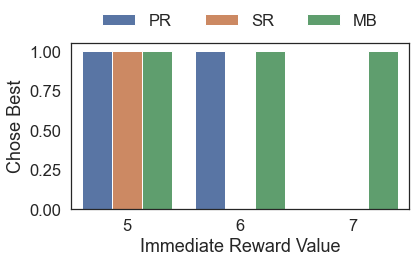

In [81]:
df=pd.DataFrame()
import seaborn as sns
sns.set(style='white', font='arial', font_scale=1.5, rc=None)
import matplotlib.pyplot as plt

imr=[5, 6, 7]*3
PR_cb=[ 1.0, 1.0, 0.0]
SR_cb=[ 1.0, 0.0, 0.0]
MB_cb=[ 1.0, 1.0, 1.0]
cbs=PR_cb+SR_cb+MB_cb
algorithms=['PR']*3+['SR']*3+['MB']*3
df['Immediate Reward Value']=imr
df['Algorithm']=algorithms
df['Chose Best']=cbs
ax=sns.barplot(data=df,x='Immediate Reward Value', y="Chose Best", hue="Algorithm")
sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
plt.tight_layout()
plt.savefig('DivergentTask_StrategyPerformance_by_ImmediateReward.png', dpi=300, bbox_inches='tight')

plt.show()

## MB Planning Divergent Structure

In [9]:

    
''' Learning to Plan v1

Written By Paul Sharp 7-6-21

The task is a 4-step decision problem,
in which end states are known to the agent
when deciding at each step.

The goal is for the agent to learn when to plan.

The MDP is structured such that each end-state has
an optimal planning startin point as a function of 
conditional probabilities

'''

#import modules
from random import sample
from numpy.random import choice
from random import random
from random import shuffle
from random import randint
import scipy.special as sf
import numpy as np
import pandas as pd
import scipy as sp
import math
from learning_to_plan_functions2 import model_based_learning_diverge
# from learning_to_plan_functions import one_step_successor_representation
import numpy as np
import pickle
chooses_best=[]
immediate_reward_magnitude=[]
for imr in range(8):
    #TASK PARAMETERS
    final_reward_magnitude=20
    number_trials=2
    number_goal=int(number_trials/2)
    #defines states, state transitions, and rewards
    final_rewards=[{'north':final_reward_magnitude,'compass':0,
                    'fox':0,'fireworks':0,'tree':0,
                    'bowling':0,'houses':0,'train':0},
                   {'north':final_reward_magnitude,'compass':0,
                    'fox':0,'fireworks':0,'tree':0,
                    'bowling':0,'houses':0,'train':0}]*number_goal

    ir_value=imr
    immediate_rewards=[[[0,ir_value],[0,0,0,0]],
                      [[0,ir_value],[0,0,0,0]]]


    #list of upcoming states to determine how to present upcoming immediate rewards
    upcoming_states=[2,3,3]

    #choice function
    max_choice=1



    transitions=[[['apple'],['trident']],

    [['window']*8+['abacus']*2,['watch']*8+['bell']*2],
    [['bell']*8+['watch']*2,['window']*2+['abacus']*8],

    [['north']*8+['compass']*2,['fox']*2+['fireworks']*8],         
    [['fox']*8+['fireworks']*2,['north']*2+['compass']*8],
    [['tree']*8+['bowling']*2,['houses']*2+['train']*8],            
    [['houses']*8+['train']*2,['tree']*2+['bowling']*8]]

    state_transitions_dictionary={
    #starting state
    'start':0,
    #second stage
    'apple':1,'trident':2,

    'window':3,'abacus':4,'bell':5,'watch':6,

    'north':7,'compass':8,'fox':9,'fireworks':10,'tree':11,'bowling':12,'houses':13,'train':14

    }

    SR_dictionary={
    #starting state
    'start':0,
    #second stage
    'apple':2,'trident':4,

    'window':6,'abacus':8,'bell':10,'watch':12,

    'north':14,'compass':15,'fox':16,'fireworks':17,'tree':18,'bowling':19,'houses':20,'train':21

    }




    #immediate reward range
    ir=10
    # Meta-Control: Do I plan at a given stage
    # cache MB values of each action one can take at a stage
    # KEY: if  one action compared to others is more valuable, deploy planning

    #planning threshold for meta-control:

    reached_final={'north':[],'compass':[],
                    'fox':[],'fireworks':[],'tree':[],
                    'bowling':[],'houses':[],'train':[]}
    faced_final={'north':0,'compass':0,
                    'fox':0,'fireworks':0,'tree':0,
                    'bowling':0,'houses':0,'train':0}
    first_choice_north={'choices':[]}
    SR_matrix=np.load('SR_matrix_pr_2actions.npy')
    rewards=0
    got_there=0
    history_action_sequences=[]

    final_locations_experiences=[]
    choosing_best=0
    number_runs=5000
    #play task with rewards
    for run in range(number_runs):

        reached_final_run={'north':0,'compass':0,
                    'fox':0,'fireworks':0,'tree':0,
                    'bowling':0,'houses':0,'train':0}

        for episode in range(number_trials):
            rewards_trial=0
            current_action_sequence=[]
            current_reward_function=np.zeros(22)

            #STAGE 1
            stage=1

            # participant is told the end states
            final_rewards_trial=final_rewards[episode]


            # print('\nfinal rewards {}'.format(final_rewards_trial)
            final_reward_index_start=14
            for k,v in final_rewards_trial.items():
                current_reward_function[final_reward_index_start]=v
                final_reward_index_start+=1
                if v==final_reward_magnitude:
                    current_destination=k

                    #participant is told immediate rewards for upcoming states
            immediate_reward=immediate_rewards[episode]

            immediate_reward1=immediate_rewards[episode][stage]
            immediate_rewards_sa=[val for val in immediate_reward1 for _ in (0, 1)]

            starting_state_values=[]
            [QMB_left,QMB_right]=model_based_learning_diverge(stage,immediate_reward,'start',final_rewards_trial)
            qvalues=[QMB_left,QMB_right]
            if run==1:
                print(immediate_reward)
                print(qvalues)
            for i in range(2):
                starting_state_values.append(qvalues[i])

            difference_sr=np.max(starting_state_values)-np.min(starting_state_values)



            #determine action via softmax or max choice function
            if max_choice==0:
                action_values = np.exp((starting_state_values)-sf.logsumexp(starting_state_values))
                values=action_values.flatten()
                draw = choice(values,1,p=values)[0]
                indices = [i for i, x in enumerate(values) if x == draw]
                current_choice=sample(indices,1)[0]
                current_action_sequence.append(current_choice)
            else:
                if difference_sr>0.01:
                    current_choice=starting_state_values.index(max(starting_state_values))

            if current_destination=='north':
                if current_choice==0:
                    choosing_best+=1

            elif current_destination=='train':
                if current_choice==1:
                    choosing_best+=1
            #experience state transition
            next_state=sample(transitions[state_transitions_dictionary['start']][current_choice],1)[0]



            #receive immediate reward
            rewards+=immediate_rewards_sa[current_choice]


            # STAGES 2-4
            for stage in range(2,4):
                if stage==2:
                    immediate_reward=immediate_rewards[episode]
                    
                    immediate_reward1=immediate_rewards[episode][stage-1]
                    immediate_rewards_sa=[val for val in immediate_reward1 for _ in (0, 1)]



                    [QMB_left,QMB_right]=model_based_learning_diverge(stage,immediate_reward,next_state,final_rewards_trial)
                    qvalues=[QMB_left,QMB_right]
                else:
                    [QMB_left,QMB_right]=model_based_learning_diverge(stage,immediate_reward,next_state,final_rewards_trial)
                    qvalues=[QMB_left,QMB_right]


                # print('big reward: {}, stage : {}, qvalues: {}'.format(current_destination ,stage,qvalues))
                difference_sr=np.max(qvalues)-np.min(qvalues)


                #determine action via softmax or max choice function
                if max_choice==0:
                    action_values = np.exp((qvalues)-sf.logsumexp(qvalues))
                    values=action_values.flatten()
                    draw = choice(values,1,p=values)[0]
                    indices = [i for i, x in enumerate(values) if x == draw]
                    current_choice=sample(indices,1)[0]
                    current_action_sequence.append(current_choice)
                else:
                    if difference_sr>0.01:
                        current_choice=qvalues.index(max(qvalues))

                    else:
                        current_choice=np.random.randint(2)

                #receive immediate reward
                rewards+=immediate_reward1[current_choice]

                rewards_trial+=immediate_reward1[current_choice]
                #experience state transition
                next_state=sample(transitions[state_transitions_dictionary[next_state]][current_choice],1)[0]

                if stage==3:
                    rewards+=final_rewards_trial[next_state]
                    if final_rewards_trial[next_state]==final_reward_magnitude:
                        got_there+=1
                        reached_final_run[current_destination]+=1




            final_locations_experiences.append(current_destination) #save experience of current destination
            done_planning=0 #reset planning
        for k,v in reached_final_run.items():
            reached_final[k].append(v)


    # for key,value in stage_when_to_plan.items():
    #     if value==0:
    #         print('For final state {}, planning depth = {}'.format(key,'unplannable'))
    #     else:
    #         print('For final state {}, planning depth = {}'.format(key,5-value))
    from statsmodels.stats.proportion import proportions_ztest
#     print('\nrewards average {}  using SR'.format(rewards/number_runs))
#     print('\ndestination got there average {}  using SR'.format(got_there/number_runs))
#     print('percentage times chose best:{}'.format(choosing_best/10000.0))
    chooses_best.append(choosing_best/10000.0)
    immediate_reward_magnitude.append(imr)
    count = choosing_best
    nobs = 10000
    value = .50
    stat, pval = proportions_ztest(count, nobs, value)
#     print('p-value proportions test {0:0.3f}'.format(pval))

    
print('Chose Best: {} for following immediate rewards: {}'.format(chooses_best,immediate_reward_magnitude))

[[0, 0], [0, 0, 0, 0]]
[13.600000000000001, 6.4]
[[0, 0], [0, 0, 0, 0]]
[13.600000000000001, 6.4]
[[0, 1], [0, 0, 0, 0]]
[13.600000000000001, 7.4]
[[0, 1], [0, 0, 0, 0]]
[13.600000000000001, 7.4]
[[0, 2], [0, 0, 0, 0]]
[13.600000000000001, 8.4]
[[0, 2], [0, 0, 0, 0]]
[13.600000000000001, 8.4]
[[0, 3], [0, 0, 0, 0]]
[13.600000000000001, 9.4]
[[0, 3], [0, 0, 0, 0]]
[13.600000000000001, 9.4]
[[0, 4], [0, 0, 0, 0]]
[13.600000000000001, 10.4]
[[0, 4], [0, 0, 0, 0]]
[13.600000000000001, 10.4]
[[0, 5], [0, 0, 0, 0]]
[13.600000000000001, 11.4]
[[0, 5], [0, 0, 0, 0]]
[13.600000000000001, 11.4]
[[0, 6], [0, 0, 0, 0]]
[13.600000000000001, 12.4]
[[0, 6], [0, 0, 0, 0]]
[13.600000000000001, 12.4]
[[0, 7], [0, 0, 0, 0]]
[13.600000000000001, 13.4]
[[0, 7], [0, 0, 0, 0]]
[13.600000000000001, 13.4]
Chose Best: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] for following immediate rewards: [0, 1, 2, 3, 4, 5, 6, 7]


# Build CSVs for PsychoPy for SR task

In [309]:
#import modules
from random import sample
from numpy.random import choice
from random import random
from random import shuffle
from random import randint
import scipy.special as sf
import csv
import numpy as np
import pandas as pd
import scipy as sp
import math
from learning_to_plan_functions import model_based_learning
from learning_to_plan_functions import one_step_successor_representation

#defines states, state transitions, and rewards
final_rewards=[{'compass':10,'tophat':-10,'microphone':-10,'snorkel':-10,'north':-10},
               {'compass':-10,'tophat':10,'microphone':-10,'snorkel':-10,'north':-10},
               {'compass':-10,'tophat':-10,'microphone':10,'snorkel':-10,'north':-10},
               {'compass':-10,'tophat':-10,'microphone':-10,'snorkel':10,'north':-10},
               {'compass':-10,'tophat':-10,'microphone':-10,'snorkel':-10,'north':10}
              ]

#list of upcoming states to determine how to present upcoming immediate rewards
upcoming_states=[2,3,3]

#choice function
max_choice=1

transitions=[[['apple']*100,['trident']*100,['window']*100,['abacus']*100,['bell']*100,['watch']*100], 
             
[['fox']*40+['tree']*10,['fox']*30+['fireworks']*20], 
[['fox']*30+['fireworks']*20,['tree']*30+['fireworks']*20], 
[['tree']*30+['fireworks']*20,['fox']*30+['fireworks']*20],
[['fox']*30+['fireworks']*20,['tree']*30+['fireworks']*20],
[['tree']*30+['fireworks']*20,['fox']*30+['fireworks']*20],             
[['tree']*30+['fireworks']*20,['tree']*40+['fox']*10], 

[['houses']*16+['train']*4,['train']*12+['houses']*8 ],
[['houses']*8+['train']*12,['train']*12+['houses']*8 ],
[['houses']*12+['train']*8,['train']*16+['houses']*4 ]]

transitions2=[[['apple']*100,['trident']*100,['window']*100,['abacus']*100,['bell']*100,['watch']*100], 
             
[['fox']*40+['tree']*10,['fox']*30+['fireworks']*20], 
[['fox']*30+['fireworks']*20,['tree']*30+['fireworks']*20], 
[['tree']*30+['fireworks']*20,['fox']*30+['fireworks']*20],
[['fox']*30+['fireworks']*20,['tree']*30+['fireworks']*20],
[['tree']*30+['fireworks']*20,['fox']*30+['fireworks']*20],             
[['tree']*30+['fireworks']*20,['tree']*40+['fox']*10], 

[['houses']*12+['train']*3,['train']*9+['houses']*6 ],
[['houses']*6+['train']*9,['train']*9+['houses']*6 ],
[['houses']*9+['train']*6,['train']*12+['houses']*3 ]]

transitions3=[[['apple']*100,['trident']*100,['window']*100,['abacus']*100,['bell']*100,['watch']*100], 
             
[['fox']*40+['tree']*10,['fox']*30+['fireworks']*20], 
[['fox']*30+['fireworks']*20,['tree']*30+['fireworks']*20], 
[['tree']*30+['fireworks']*20,['fox']*30+['fireworks']*20],
[['fox']*30+['fireworks']*20,['tree']*30+['fireworks']*20],
[['tree']*30+['fireworks']*20,['fox']*30+['fireworks']*20],             
[['tree']*30+['fireworks']*20,['tree']*40+['fox']*10], 

[['houses']*8+['train']*2,['train']*6+['houses']*4 ],
[['houses']*4+['train']*6,['train']*6+['houses']*4 ],
[['houses']*6+['train']*4,['train']*8+['houses']*2 ]]

transitions4=[[['apple']*100,['trident']*100,['window']*100,['abacus']*100,['bell']*100,['watch']*100], 
             
[['fox']*40+['tree']*10,['fox']*30+['fireworks']*20], 
[['fox']*30+['fireworks']*20,['tree']*30+['fireworks']*20], 
[['tree']*30+['fireworks']*20,['fox']*30+['fireworks']*20],
[['fox']*30+['fireworks']*20,['tree']*30+['fireworks']*20],
[['tree']*30+['fireworks']*20,['fox']*30+['fireworks']*20],             
[['tree']*30+['fireworks']*20,['tree']*40+['fox']*10], 

[['houses']*4+['train']*1,['train']*3+['houses']*2 ],
[['houses']*2+['train']*3,['train']*3+['houses']*2 ],
[['houses']*3+['train']*2,['train']*4+['houses']*1 ]]

state_transitions_dictionary={
#starting state
'start':0,
#second stage
'apple':1,'trident':2,'window':3,'abacus':4,'bell':5,'watch':6,
#third stage
'fox':7,'fireworks':8,'tree':9,
#final
'houses':10,'train':11,

}

sr_dictionary={
#starting state
'start':0,
#second stage
'apple':6,'trident':8,'window':10,'abacus':12,'bell':14,'watch':16,
#third stage
'fox':18,'fireworks':20,'tree':22,
#final
'houses':24,'train':25,

}



#first stage began planning:
first_stage=[]


#initialize variables
mfq_values=[[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]]
meta_learning_rate=0.5

bandits=np.load('bandit_trajectories.npy')
number_trials=150

#immediate reward range
ir=0
# Meta-Control: Do I plan at a given stage
# cache MB values of each action one can take at a stage
# KEY: if  one action compared to others is more valuable, deploy planning

#planning threshold for meta-control:
planning_threshold=0.001
cached_mb_differences={'compass':[planning_threshold]*4,'tophat':[planning_threshold]*4,'microphone':[planning_threshold]*4,'snorkel':[planning_threshold]*4,'north':[planning_threshold]*4}
cached_done_planning={'compass':0,'tophat':0,'microphone':0,'snorkel':0,'north':0}

stage_when_to_plan={'compass':0,'tophat':1,'microphone':1,'snorkel':1,'north':1}
experience_counter=np.zeros(23)
csv_lines=[['start','imageone','imagetwo','imagethree','secondchoice','thirdchoice','corr1','corr2','corr3','d1a','d1b','d2a','d2b','d2c','d3a','d3b','d3c','e1','e2']]

d1_1='apple'
d1_2='trident'
d1_3='window'
d1_4='abacus'
d1_5='bell'
d1_6='watch'
d2_left='fox'
d2_middle='fireworks'
d2_right='tree'
end1='houses'
end2='train'


for start in range(6):
    index2=0
    index3=0
    third_choice='left'
    i=0
    j=0
    for index in range(100):
        first=transitions[0][start][index]
        
        if first =='apple':
            corr1=1
        elif first=='trident':
            corr=2
        elif first=='window':
            corr=3
        elif first=='abacus':
            corr=4
        elif first=='bell':
            corr=5
        elif first=='watch':
            corr=6
            
        if index==50:
            index2=0
            i=1
            second_choice='right'
        

        if index<49:
            second_choice='left'
            
        second=transitions[state_transitions_dictionary[first]][i][index2]
        if index3==0:
            third_choice='left'
        if second=='fox':
            corr2='a'
            if first=='apple':
                if second_choice=='left':
                    
                    if index3==20:
                        j=1
                        third_choice='right'
                        index3=0
                   
                    third=transitions[state_transitions_dictionary[second]][j][index3]
                    index3+=1
                    
                    if j==1:
                        if index3==20:
                            index3=0
                            j=0
                        
                elif second_choice=='right':

                    if index3==15:
                        j=1
                        third_choice='right'
                        index3=0
                   
                    third=transitions2[state_transitions_dictionary[second]][j][index3]
                    index3+=1
                    
                    if j==1:
                        if index3==15:
                            index3=0
                            j=0
                            
                            
            elif first=='watch':
                if second_choice=='right':
                    if index3==5:
                        j=1
                        third_choice='right'
                        index3=0
                        
                    third=transitions4[state_transitions_dictionary[second]][j][index3]
                    index3+=1
                    
                    if j==1:
                        if index3==5:
                            index3=0
                            j=0
                            
                            
            else:
                if index3==15:
                    j=1
                    third_choice='right'
                    index3=0
                    
                
                
                third=transitions2[state_transitions_dictionary[second]][j][index3]
                index3+=1
                    
                if j==1:
                    if index3==15:
                        index3=0
                        j=0
                        
                        
                
                
                    
                    
        elif second=='fireworks':
            corr2='g'
            
            if index3==10:
                j=1
                third_choice='right'
                index3=0

            third=transitions3[state_transitions_dictionary[second]][j][index3]
            index3+=1
                    
            if j==1:
                if index3==10:
                    index3=0
                    j=0
                   
                
                
        elif second=='tree':
            corr2='l'
            if first=='watch':
                if second_choice=='right':
                    if index3==20:
                        j=1
                        third_choice='right'
                        index3=0
                   
                    third=transitions[state_transitions_dictionary[second]][j][index3]
                    index3+=1
                    
                    if j==1:
                        if index3==20:
                            index3=0
                            j=0
                            
                            
                        
                elif second_choice=='right':
                    if index3==15:
                        j=1
                        third_choice='right'
                        index3=0
                   
                    third=transitions2[state_transitions_dictionary[second]][j][index3]
                    index3+=1
                    
                    if j==1:
                        if index3==15:
                            index3=0
                            j=0
                            
                            
                            
            elif first=='apple':
                if second_choice=='left':
                    if index3==5:
                        j=1
                        third_choice='right'
                        index3=0
                        
                    third=transitions4[state_transitions_dictionary[second]][j][index3]
                    index3+=1
                    
                    if j==1:
                        if index3==5:
                            index3=0
                            j=0
                            
                            
                            
            else:
                if index3==15:
                    j=1
                    third_choice='right'
                    index3=0
                   
                third=transitions2[state_transitions_dictionary[second]][j][index3]
                index3+=1
                    
                if j==1:
                    if index3==15:
                        index3=0
                        j=0
                        
                        
                        
        index2+=1
    
       
        if third=='houses':
            corr3='a'
        elif third == 'train':
            corr3='l'
        
       

    
        
        current_line=[first,second,third,second_choice,third_choice,corr1,corr2,corr3,d1_1,d1_2,d1_3,d1_4,d1_5,d1_6,d2_left,d2_middle,d2_right,end1,end2]
        csv_lines.append(current_line)

with open('learning_state_transitions_SRtask.csv', 'a') as f:
    w=csv.writer(f)
    w.writerows(csv_lines)
                            
                         

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
1
2
3
4
5
6
7
8
9
10
11
12
13
14


# Build CSVs for PsychoPy for PR task

In [35]:
#import modules
from random import sample
from numpy.random import choice
from random import random
from random import shuffle
from random import randint
import scipy.special as sf
import csv
import numpy as np
import pandas as pd
import scipy as sp
import math
from learning_to_plan_functions import model_based_learning
from learning_to_plan_functions import one_step_successor_representation

#defines states, state transitions, and rewards
final_rewards=[{'compass':10,'tophat':-10,'microphone':-10,'snorkel':-10,'north':-10},
               {'compass':-10,'tophat':10,'microphone':-10,'snorkel':-10,'north':-10},
               {'compass':-10,'tophat':-10,'microphone':10,'snorkel':-10,'north':-10},
               {'compass':-10,'tophat':-10,'microphone':-10,'snorkel':10,'north':-10},
               {'compass':-10,'tophat':-10,'microphone':-10,'snorkel':-10,'north':10}
              ]

#list of upcoming states to determine how to present upcoming immediate rewards
upcoming_states=[2,3,3]

#choice function
max_choice=1

transitions=[[['apple']*200,['trident']*200,['window']*200],
              
         
             
[['bell']*80+['bowling']*20,['watch']*60+['fox']*40], 
[['fox']*60+['tree']*40,['fireworks']*60+['watch']*40], 
[['tree']*60+['fireworks']*40,['bowling']*80+['bell']*20], 

[['houses']*32+['compass']*8,['train']*16+['thermometer']*24],
[['houses']*12+['train']*28,['thermometer']*12+['compass']*28 ],
[['train']*16+['compass']*24,['houses']*16+['thermometer']*24],   

[['microphone']*16+['north']*24,['snorkel']*16+['tophat']*24 ],
[['snorkel']*12+['microphone']*28,['tophat']*12+['north']*28 ],
[['microphone']*16+['tophat']*24,['snorkel']*32+['north']*8]
]

transitions2=[[['apple']*200,['trident']*200,['window']*200],
              
         
[['bell']*80+['bowling']*20,['watch']*60+['fox']*40], 
[['fox']*60+['tree']*40,['fireworks']*60+['watch']*40], 
[['tree']*60+['fireworks']*40,['bowling']*80+['bell']*20], 

[['houses']*24+['compass']*6,['train']*12+['thermometer']*18],
[['houses']*9+['train']*21,['thermometer']*9+['compass']*21 ],
[['train']*12+['compass']*18,['houses']*12+['thermometer']*18],   

[['microphone']*12+['north']*18,['snorkel']*12+['tophat']*18 ],
[['snorkel']*9+['microphone']*21,['tophat']*9+['north']*21 ],
[['microphone']*12+['tophat']*18,['snorkel']*24+['north']*6]
]

transitions3=[[['apple']*200,['trident']*200,['window']*200],
              
         
             
[['bell']*80+['bowling']*20,['watch']*60+['fox']*40], 
[['fox']*60+['tree']*40,['fireworks']*60+['watch']*40], 
[['tree']*60+['fireworks']*40,['bowling']*80+['bell']*20], 

[['houses']*16+['compass']*4,['train']*8+['thermometer']*12],
[['houses']*6+['train']*14,['thermometer']*6+['compass']*14 ],
[['train']*8+['compass']*12,['houses']*8+['thermometer']*12],
              
[['microphone']*8+['north']*12,['snorkel']*8+['tophat']*12 ],            
[['snorkel']*6+['microphone']*14,['tophat']*6+['north']*14 ],
[['microphone']*8+['tophat']*12,['snorkel']*16+['north']*4]
]

transitions4=[[['apple']*200,['trident']*200,['window']*200],
              
         
             
[['bell']*80+['bowling']*20,['watch']*60+['fox']*40], 
[['fox']*60+['tree']*40,['fireworks']*60+['watch']*40], 
[['tree']*60+['fireworks']*40,['bowling']*80+['bell']*20], 

[['houses']*8+['compass']*2,['train']*4+['thermometer']*6],
[['houses']*3+['train']*7,['thermometer']*3+['compass']*7 ],
[['train']*4+['compass']*6,['houses']*4+['thermometer']*6],   

[['microphone']*4+['north']*6,['snorkel']*4+['tophat']*6 ],
[['snorkel']*3+['microphone']*7,['tophat']*3+['north']*7 ],
[['microphone']*4+['tophat']*6,['snorkel']*8+['north']*2]
]

state_transitions_dictionary={
#starting state
'start':0,
#second stage
'apple':1,'trident':2,'window':3,
#third stage
'bell':4,'watch':5,'fox':6,'fireworks':7,'tree':8,'bowling':9,
#final
'houses':10,'train':11,'thermometer':12,'compass':13,'north':14,'microphone':15,'tophat':16,'snorkel':17
}

sr_dictionary={
#starting state
'start':0,
#second stage
'apple':3,'trident':5,'window':7,
#third stage  
'bell':9,'watch':11,'fox':13,'fireworks':15,'tree':17,'bowling':19,
#final
'houses':21,'train':22,'thermometer':23,'compass':24,'north':25,'microphone':26,'tophat':27,'snorkel':28
}


#first stage began planning:
first_stage=[]


#initialize variables
mfq_values=[[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]]
meta_learning_rate=0.5

bandits=np.load('bandit_trajectories.npy')
number_trials=150

#immediate reward range
ir=0
# Meta-Control: Do I plan at a given stage
# cache MB values of each action one can take at a stage
# KEY: if  one action compared to others is more valuable, deploy planning

#planning threshold for meta-control:
planning_threshold=0.001
cached_mb_differences={'compass':[planning_threshold]*4,'tophat':[planning_threshold]*4,'microphone':[planning_threshold]*4,'snorkel':[planning_threshold]*4,'north':[planning_threshold]*4}
cached_done_planning={'compass':0,'tophat':0,'microphone':0,'snorkel':0,'north':0}

stage_when_to_plan={'compass':0,'tophat':1,'microphone':1,'snorkel':1,'north':1}
experience_counter=np.zeros(23)
csv_lines=[['start','imageone','imagetwo','secondchoice','thirdchoice','corr1','corr2','corr3','d1a','d1b','d2a','d2b','d2c','d2d','d2e','d2f','e1','e2','e3','e4','e5','e6','e7','e8']]

d1_1='apple'
d1_2='trident'
d1_3='window'

d2_1='bell'
d2_2='watch'
d2_3='fox'
d2_4='fireworks'
d2_5='tree'
d2_6='bowling'
end1='houses'
end2='train'
end3='thermometer'
end4='compass'
end5='north'
end6='microphone'
end7='tophat'
end8='snorkel'


for start in range(3):
    index2=0
    index3=0
    third_choice='left'
    i=0
    j=0
    for index in range(200):
        first=transitions[0][start][index]
        
        if first =='apple':
            corr1=1
        elif first=='trident':
            corr=2
        elif first=='window':
            corr=3
    
            
        if index==100:
            index2=0
            i=1
            second_choice='right'
        

        if index<99:
            second_choice='left'
            
        second=transitions[state_transitions_dictionary[first]][i][index2]
        if index3==0:
            third_choice='left'
        if second=='fox':
            corr2=3
            if first=='apple':
                
                    
                if index3==20:
                    j=1
                    third_choice='right'
                    index3=0

                third=transitions3[state_transitions_dictionary[second]][j][index3]
                index3+=1

                if j==1:
                    if index3==20:
                        index3=0
                        j=0
                        
               
                            
                            
            elif first=='trident':
                if index3==30:
                    j=1
                    third_choice='right'
                    index3=0

                third=transitions2[state_transitions_dictionary[second]][j][index3]
                index3+=1

                if j==1:
                    if index3==30:
                        index3=0
                        j=0
        if second=='fireworks':
            corr2=4
            if first=='trident':
                
                    
                if index3==30:
                    j=1
                    third_choice='right'
                    index3=0

                third=transitions2[state_transitions_dictionary[second]][j][index3]
                index3+=1

                if j==1:
                    if index3==30:
                        index3=0
                        j=0
                        
               
                            
                            
            elif first=='window':
                if index3==20:
                    j=1
                    third_choice='right'
                    index3=0

                third=transitions3[state_transitions_dictionary[second]][j][index3]
                index3+=1

                if j==1:
                    if index3==20:
                        index3=0
                        j=0
        if second=='bell':
            corr2=1
            if first=='apple':
                
                    
                if index3==40:
                    j=1
                    third_choice='right'
                    index3=0

                third=transitions[state_transitions_dictionary[second]][j][index3]
                index3+=1

                if j==1:
                    if index3==40:
                        index3=0
                        j=0
                        
               
                            
                            
            elif first=='window':
                if index3==10:
                    j=1
                    third_choice='right'
                    index3=0

                third=transitions4[state_transitions_dictionary[second]][j][index3]
                index3+=1

                if j==1:
                    if index3==10:
                        index3=0
                        j=0
        if second=='bowling':
            corr2=6
            if first=='apple':
                
                    
                if index3==10:
                    j=1
                    third_choice='right'
                    index3=0

                third=transitions4[state_transitions_dictionary[second]][j][index3]
                index3+=1

                if j==1:
                    if index3==10:
                        index3=0
                        j=0
                        
               
                            
                            
            elif first=='trident':
                if index3==40:
                    j=1
                    third_choice='right'
                    index3=0

                third=transitions[state_transitions_dictionary[second]][j][index3]
                index3+=1

                if j==1:
                    if index3==40:
                        index3=0
                        j=0
        if second=='tree':
            corr2=5
            if first=='trident':
                
                    
                if index3==20:
                    j=1
                    third_choice='right'
                    index3=0

                third=transitions3[state_transitions_dictionary[second]][j][index3]
                index3+=1

                if j==1:
                    if index3==20:
                        index3=0
                        j=0
                        
               
                            
                            
            elif first=='window':
                if index3==30:
                    j=1
                    third_choice='right'
                    index3=0

                third=transitions2[state_transitions_dictionary[second]][j][index3]
                index3+=1

                if j==1:
                    if index3==30:
                        index3=0
                        j=0
        if second=='watch':
            corr2=2
            if first=='apple':
                
                    
                if index3==30:
                    j=1
                    third_choice='right'
                    index3=0

                third=transitions2[state_transitions_dictionary[second]][j][index3]
                index3+=1

                if j==1:
                    if index3==30:
                        index3=0
                        j=0
                        
               
                            
                            
            elif first=='trident':
                if index3==20:
                    j=1
                    third_choice='right'
                    index3=0

                third=transitions2[state_transitions_dictionary[second]][j][index3]
                index3+=1

                if j==1:
                    if index3==30:
                        index3=0
                        j=0
                      
        index2+=1
#     end1='houses'
# end2='train'
# end3='thermometer'
# end4='compass'
# end5='north'
# end6='microphone'
# end7='tophat'
# end8='snorkel'

       
        if third=='houses':
            corr3=1
        elif third == 'train':
            corr3=2
        elif third == 'thermometer':
            corr3=3
        elif third == 'compass':
            corr3=4
        elif third == 'north':
            corr3=5
        elif third == 'microphone':
            corr3=6
        elif third == 'tophat':
            corr3=7
        elif third == 'snorkel':
            corr3=8
        
        
        
       

    
        
        current_line=[first,second,third,second_choice,third_choice,corr1,corr2,corr3,d1_1,d1_2,d1_3,d2_1,d2_2,d2_3,d2_4,d2_5,d2_6,end1,end2,end3,end4,end5,end6,end7,end8]
        csv_lines.append(current_line)

with open('learning_state_transitions_PRtask.csv', 'a') as f:
    w=csv.writer(f)
    w.writerows(csv_lines)
                            
                         